# 1-5-Genome-annotation-analysis-R
Jakke Neiro$^1$
1. Aboobaker laboratory, Department of Zoology, University of Oxford

## Contents of notebook
* 1. Introduction
* 2. Plots of genome annotation
    * 2.1 Categories of transcripts
    * 2.2 Transcript length
    * 2.3 Transcripts and TPM values
* 3. Gene ontology analysis of new coding transcripts
    * 3.1 GO analysis
    * 3.2 GO plots
        * 3.2.1 Biological process
        * 3.2.2 Molecular process
        * 3.2.3 Cellular component
* 4. Homology to Dugesia japonica

## Files:
* Input: 
    * gffcmp.stringtie_merged.gtf.tmap
    * noncoding_final_May2021.csv
    * ncrna_list.csv
    * rna_list_tpm.txt
    * ncrna_new_coding_May2021.GO.tab
    * ncrna_coding_May2021.GO.tab
* Output: 
    * Fig 1-5-1 Characterisation of transcripts in the new annotation
    * Fig-1-5-2 Transcript length (bp) of transcripts in different categories
    * Fig-1-5-3 Maximal TPM for transcripts in different categories
    * Fig-1-5-4 Distribution of enrichment categories
    * Fig-1-5-5 GO analysis for biological processes.
    * Fig-1-5-6 GO analysis for molecular function
    * Fig-1-5-7 GO analysis for cellular components

# 1. Introduction

Plots were generated to inspect the transcripts and visualize the GO analysis. 

# 2. Plots of genome annotation

## 2.1 Categories of transcripts

* All Neiro transcriptome: 91068
* Identical: 28624
* Isoforms: 50213
* Novel coding: 5161
* Novel non-coding: 6191

The frequencies and distribution of transcripts was plotted:

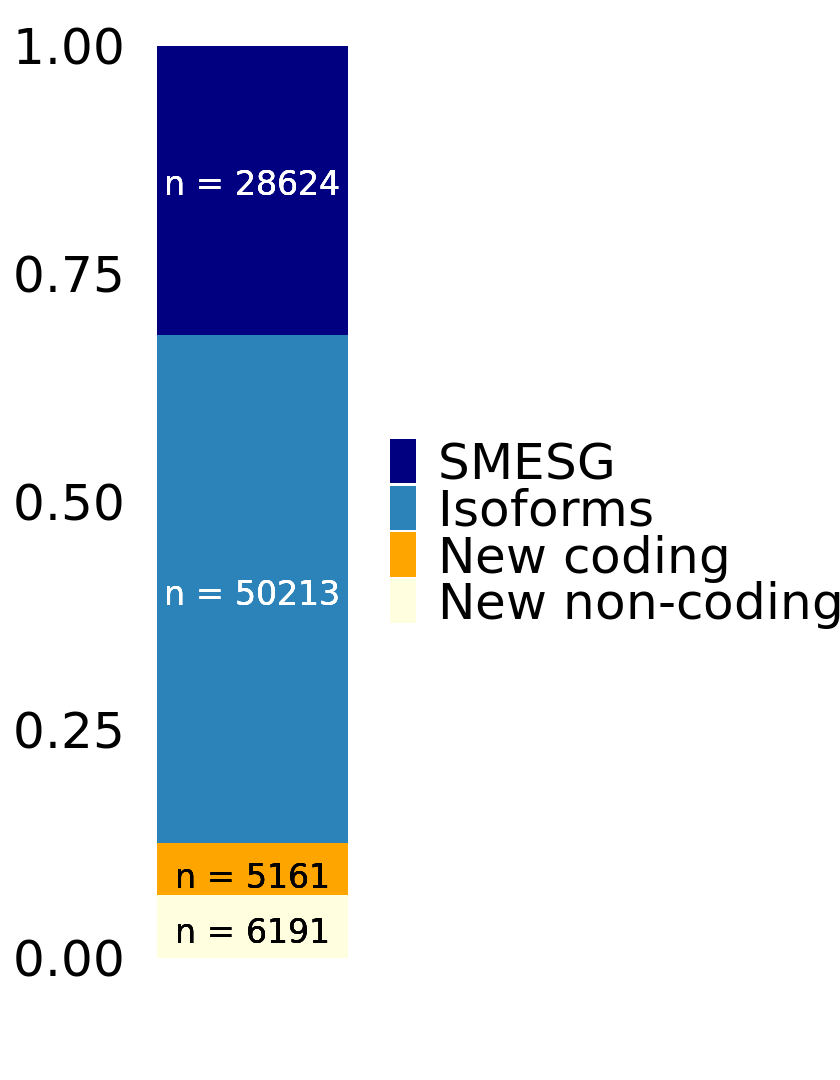

In [1]:
library(ggplot2)
options(repr.plot.width = 7.0, repr.plot.height = 9)
df = data.frame(class=factor(c("SMESG", "Isoforms", "New coding", "New non-coding"), levels=c("SMESG", "Isoforms", "New coding", "New non-coding")), value=c(28624, 50213, 5161, 6191), id = rep(" ", 4))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=30))
p = p + scale_fill_manual(name=" ", values=c("navyblue", "#2B83BA", "orange", "lightyellow"))
#p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
#p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
p = p + geom_text(aes(label=c("n = 28624"), y=c(0.85)), size = 7, col="white")
p = p + geom_text(aes(label=c("n = 50213"), y=c(0.4)), size = 7, col="white")
p = p + geom_text(aes(label=c("n = 5161"), y=c(0.09)), size = 7, col="black")
p = p + geom_text(aes(label=c("n = 6191"), y=c(0.03)), size = 7, col="black")
p

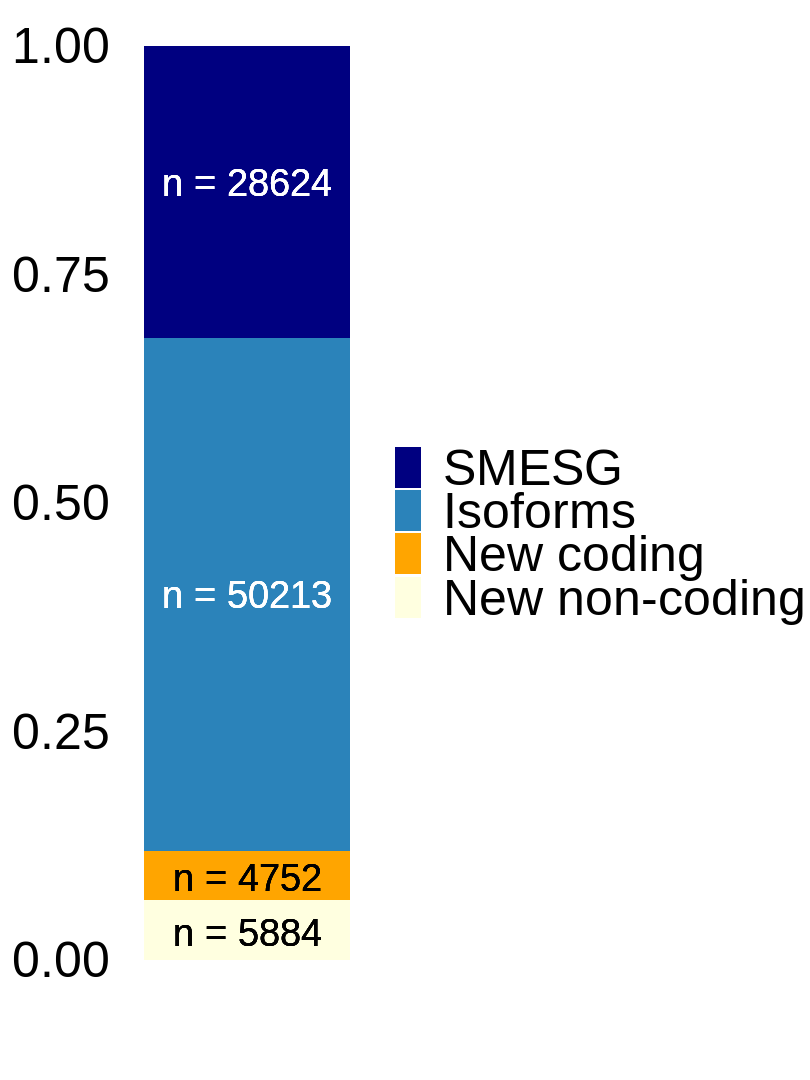

In [5]:
library(ggplot2)
options(repr.plot.width = 6.75, repr.plot.height = 9)
df = data.frame(class=factor(c("SMESG", "Isoforms", "New coding", "New non-coding"), levels=c("SMESG", "Isoforms", "New coding", "New non-coding")), value=c(28624, 50213, 4752, 5884), id = rep(" ", 4))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=30))
p = p + scale_fill_manual(name=" ", values=c("navyblue", "#2B83BA", "orange", "lightyellow"))
#p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
#p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
p = p + geom_text(aes(label=c("n = 28624"), y=c(0.85)), size = 8, col="white")
p = p + geom_text(aes(label=c("n = 50213"), y=c(0.4)), size = 8, col="white")
p = p + geom_text(aes(label=c("n = 4752"), y=c(0.09)), size = 8, col="black")
p = p + geom_text(aes(label=c("n = 5884"), y=c(0.03)), size = 8, col="black")
p

**Fig 1-5-1** *Characterisation of transcripts in the new annotation*

## 2.2 Transcript length

The length of transcripts in different categories was plotted and compared: 

In [19]:
stringtie = read.table("/hydra/sexual_genome_annotation_files/ncrna_Neiro/gffcmp.stringtie_merged.gtf.tmap", header=1)
noncoding = read.table("/hydra/sexual_genome_annotation_files/ncrna_Neiro/noncoding_final_May2021.csv")
ncrna = read.table("/hydra/sexual_genome_annotation_files/ncrna_Neiro/ncrna_list.csv")
coding = subset(ncrna, !(ncrna %in% noncoding$V1))

In [20]:
stringtie_1 = subset(stringtie, stringtie$class_code == "=")
stringtie_1$ID = "1"
stringtie_2 = subset(stringtie, stringtie$class_code %in% c('c', 'k', 'm', "n", "j", "e", "o", "y"))
stringtie_2$ID = "2"
stringtie_3 = subset(stringtie, stringtie$qry_id %in% coding$V1)
stringtie_3$ID = "3"
stringtie_4 = subset(stringtie, stringtie$qry_id %in% noncoding$V1)
stringtie_4$ID = "4"
stringtie_ID = rbind(stringtie_1, stringtie_2, stringtie_3, stringtie_4)

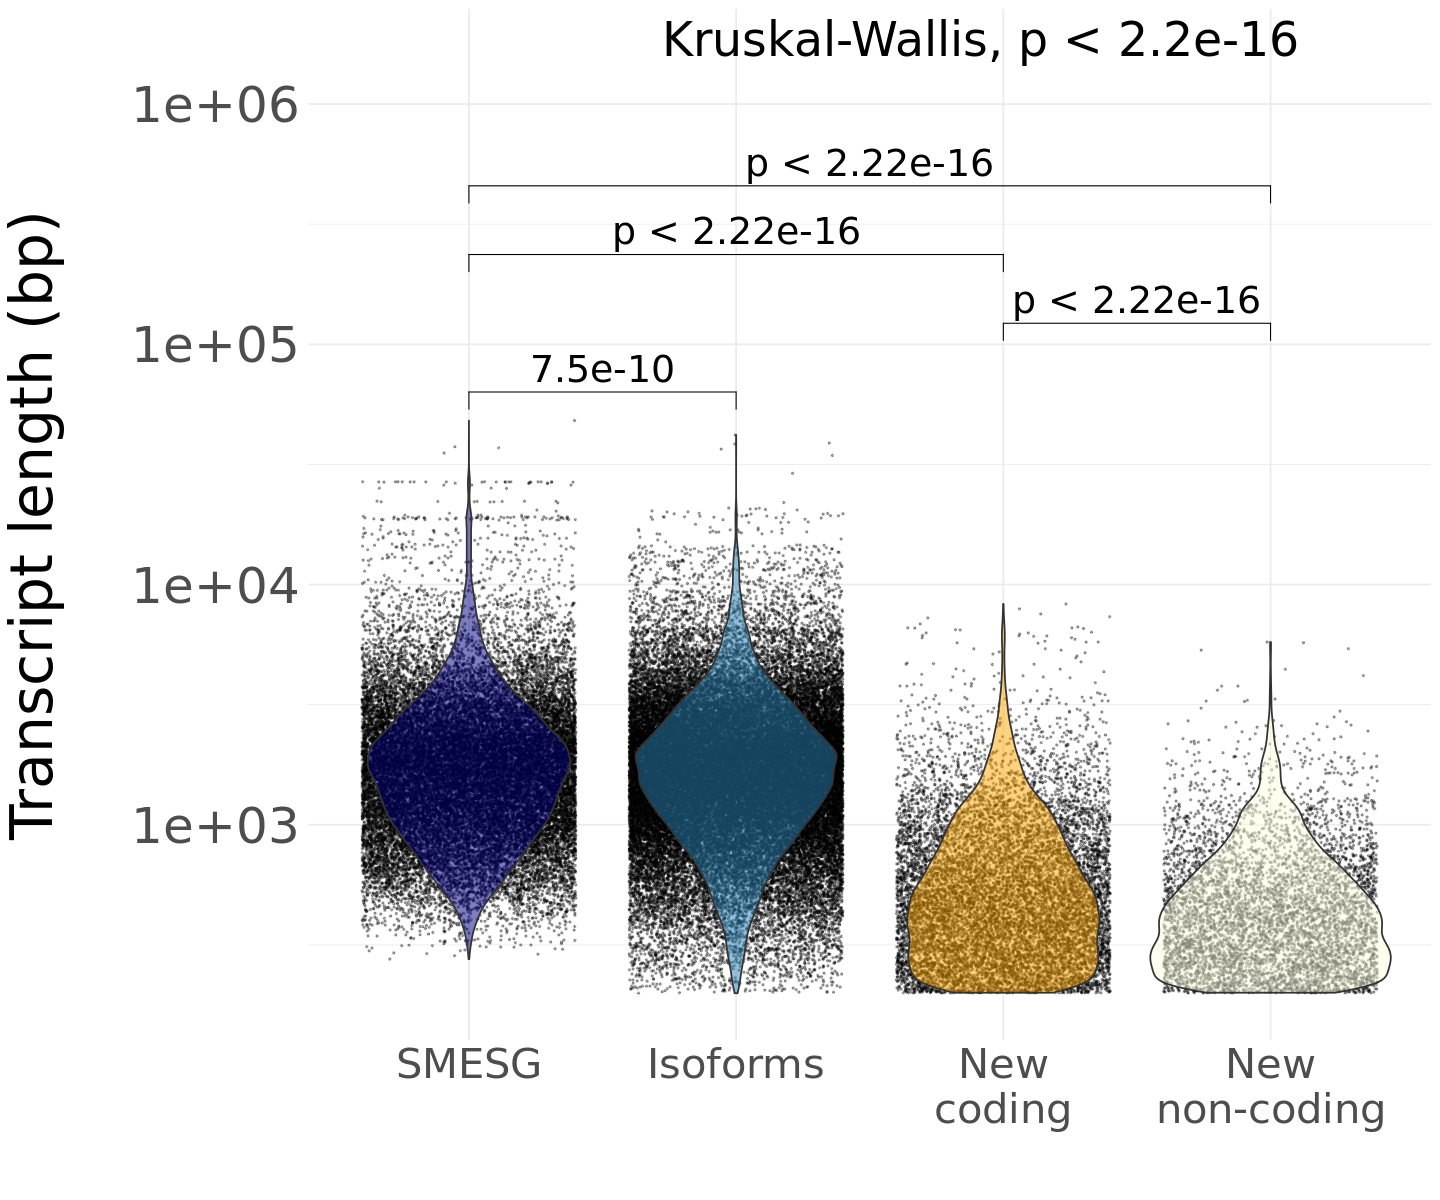

In [4]:
library(ggpubr)
options(repr.plot.width = 12, repr.plot.height = 10)
my_comparisons = list( c("1", "2"), c("3", "4"), c("1", "3"),c("1", "4"))
p = ggplot(stringtie_ID, aes(x=ID, y=len, fill=ID)) +geom_jitter(size=0.3, alpha=0.3) + geom_violin(alpha=0.5)
p = p + theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=30), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=35), legend.position="none", legend.title=element_text(), legend.text=element_text(size=25))
p = p + scale_fill_manual(name=" ", values=c("navyblue", "#2B83BA", "orange", "lightyellow"))
p = p + scale_x_discrete(labels=c("SMESG", "Isoforms", "New\ncoding", "New\nnon-coding"))
p = p + xlab("") + ylab("Transcript length (bp)\n")
p = p + scale_y_continuous(trans="log10")+stat_compare_means(label.y = 6.2, label.x=2.2, size=10)+stat_compare_means(comparisons = my_comparisons, size=8)
p

**Fig-1-5-2** *Transcript length (bp) of transcripts in different categories*

## 2.3 Transcripts and TPM values

The TPM values (transcripts per kilobase million) in different categories was plotted and compared: 

In [ ]:
tpm_files = read.table("/hydra/FACS/salmon_bootstrap/rna_list_tpm.txt", stringsAsFactors = FALSE)
file = paste("/hydra/FACS/salmon_bootstrap/", tpm_files$V1[1], "/quant.sf", sep="")
Tpm_df = read.table(file, header=TRUE)[,c(1,4)]

In [ ]:
for (i in 2:nrow(tpm_files)){
    file = paste("/hydra/FACS/salmon_bootstrap/", tpm_files$V1[i], "/quant.sf", sep="")
    tab = read.table(file, header=TRUE)[,4]
    Tpm_df = cbind(Tpm_df, tab)
} 

In [ ]:
write.csv(Tpm_df, "/hydra/FACS/TPM_df.csv")

In [29]:
Tpm_df = read.csv("/hydra/FACS/TPM_df.csv")

In [30]:
Tpm_1 = subset(Tpm_df, Tpm_df$Name %in% stringtie_1$qry_id)
Tpm_1$ID = "1"
Tpm_2 = subset(Tpm_df, Tpm_df$Name %in% stringtie_2$qry_id)
Tpm_2$ID = "2"
Tpm_3 = subset(Tpm_df, Tpm_df$Name %in% stringtie_3$qry_id)
Tpm_3$ID = "3"
Tpm_4 = subset(Tpm_df, Tpm_df$Name %in% stringtie_4$qry_id)
Tpm_4$ID = "4"
Tpm_ID = rbind(Tpm_1, Tpm_2, Tpm_3, Tpm_4)

In [31]:
Tpm_ID$max = apply(Tpm_ID[1:nrow(Tpm_ID), 3:(ncol(Tpm_ID)-1)], 1, max)
#Tpm_ID$mean = apply(Tpm_ID[1:nrow(Tpm_ID), 3:(ncol(Tpm_ID)-2)], 1, mean)

In [7]:
#write.csv(Tpm_df, "/hydra/FACS/TPM_df_max.csv")

In [27]:
#Tpm_df = read.csv("/hydra/FACS/TPM_df_max.csv")

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 2767 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 2767 rows containing non-finite values (stat_compare_means).”
Warning message:
“Removed 2767 rows containing non-finite values (stat_signif).”
Warning message:
“Removed 2767 rows containing missing values (geom_point).”


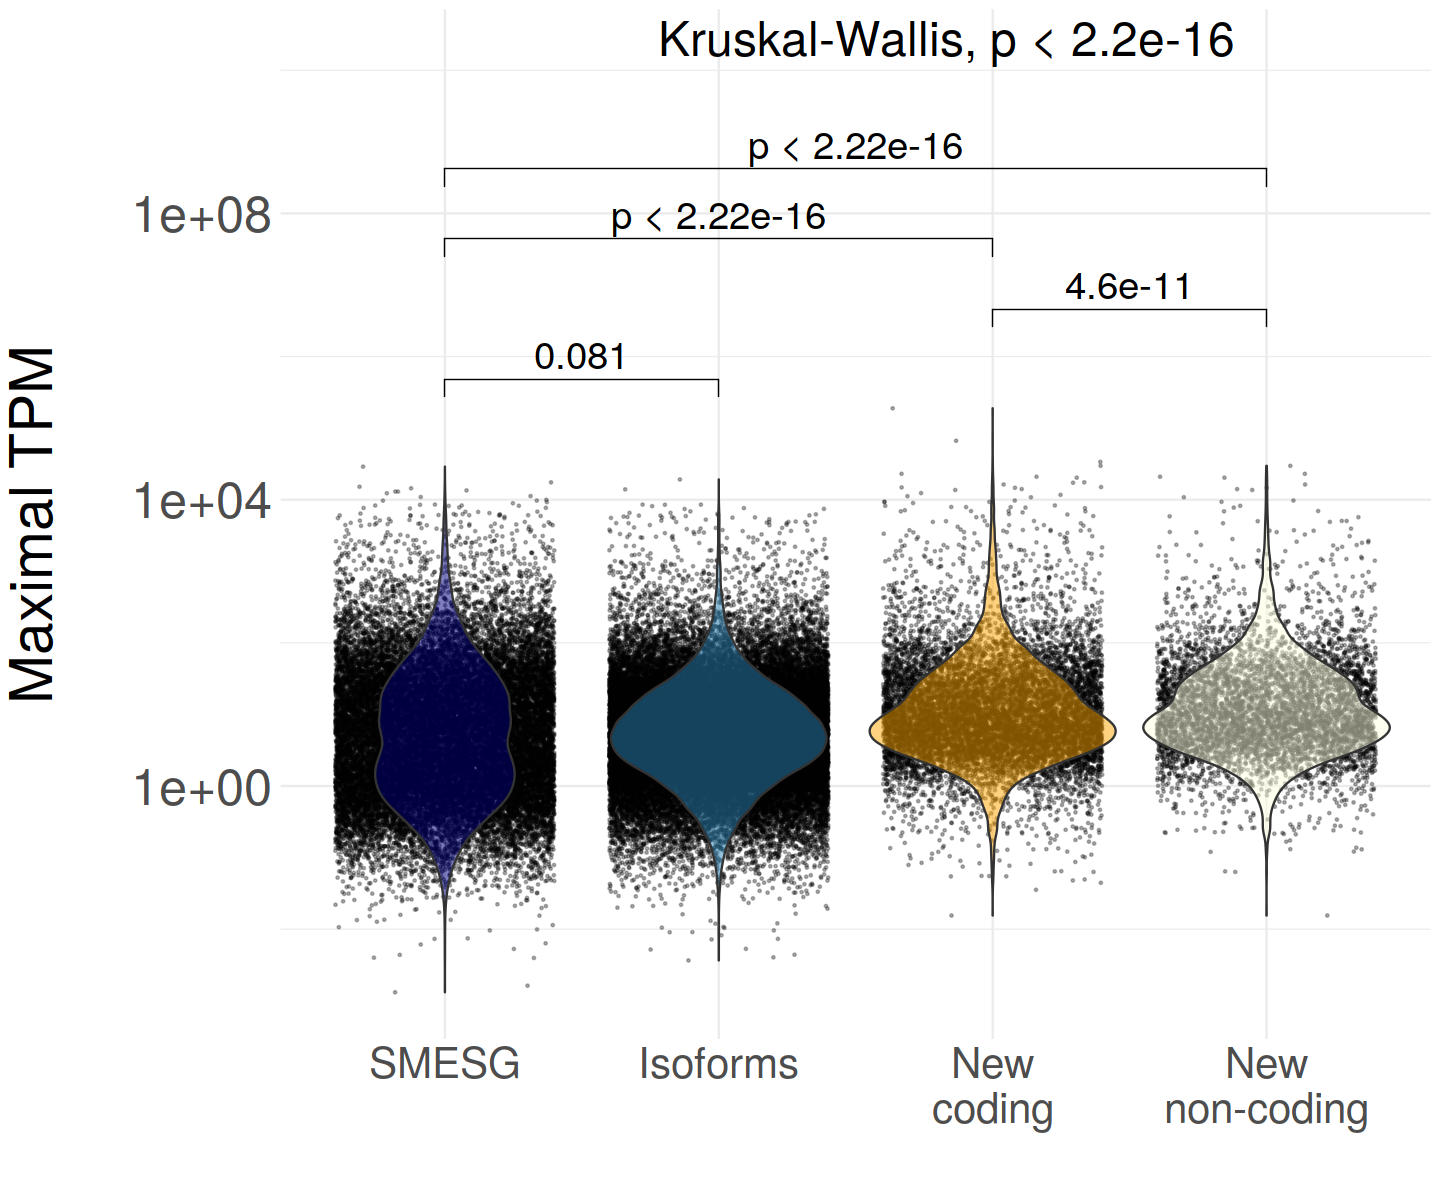

In [32]:
library(ggpubr)
options(repr.plot.width = 12, repr.plot.height = 10)
my_comparisons = list( c("1", "2"), c("3", "4"), c("1", "3"),c("1", "4"))
p = ggplot(Tpm_ID, aes(x=ID, y=max, fill=ID)) +geom_jitter(size=0.3, alpha=0.3) + geom_violin(alpha=0.5)
p = p + theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=30), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=35), legend.position="none", legend.title=element_text(), legend.text=element_text(size=25))
p = p + scale_fill_manual(name=" ", values=c("navyblue", "#2B83BA", "orange", "lightyellow"))
p = p + scale_x_discrete(labels=c("SMESG", "Isoforms", "New\ncoding", "New\nnon-coding"))
p = p + xlab("") + ylab("Maximal TPM\n")
p = p + scale_y_continuous(trans="log10")+stat_compare_means(label.y = 10.2, label.x=2.2, size=10)+stat_compare_means(comparisons = my_comparisons, size=8)
p

**Fig-1-3-3** *Maximal TPM for transcripts in different categories*

In [1]:
FACS_prop = read.csv("/drives/raid/AboobakerLab/jakke/FACS/FACS_prop.csv")

In [3]:
nrow(FACS_prop)

[1] 28003

In [ ]:
Genes

* Ubiquitous: 4102
* X1: 4376
* X1 and X2: 2992
* X1 and Xins: 1251
* X2: 5284
* X2 and Xins: 2054
* Xins: 7944

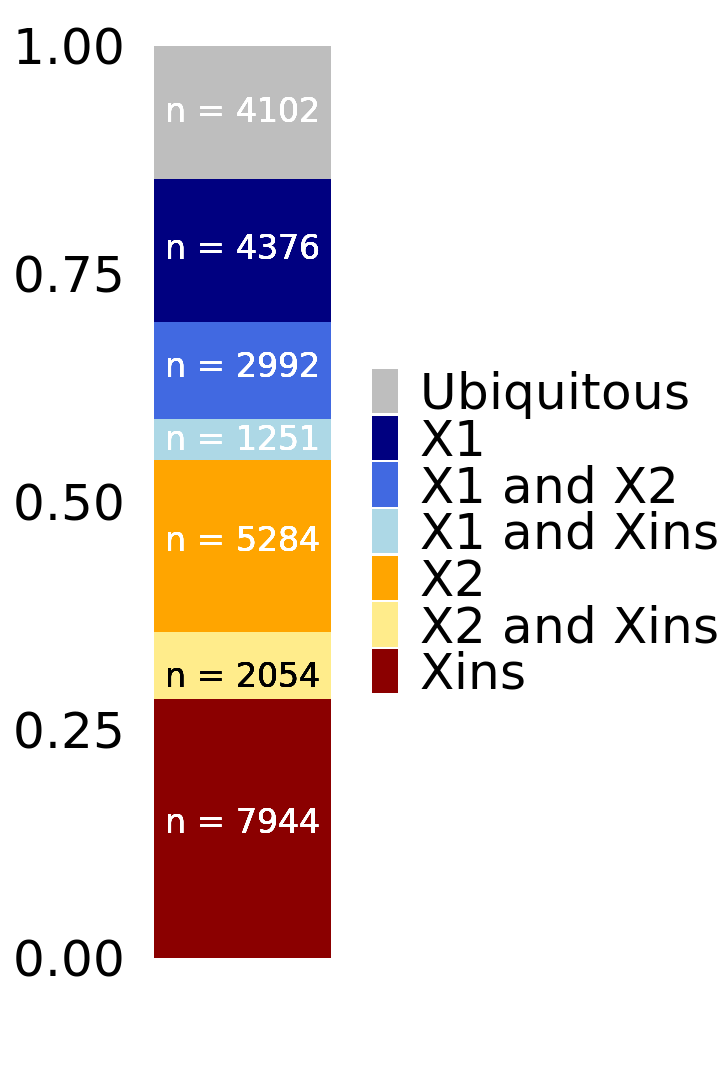

In [9]:
df = data.frame(ID = c("X1", "X2", "Xins", "X1 and X2", "X1 and Xins", "X2 and Xins", "Ubiquitous"), value=c(4376, 5284, 7944, 2992, 1251, 2054, 4102), lab = rep(" ", 7))
library(ggplot2)
options(repr.plot.width = 6.0, repr.plot.height = 9)

p = ggplot(df, aes(fill=ID, y=value, x = factor(lab))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=30))
p = p + scale_fill_manual(name=" ", values=c("grey", "navyblue", "royalblue", "lightblue", "orange", "lightgoldenrod1", "red4"))
p = p + ylab(" ") + xlab(" ") 
p = p + geom_text(aes(label=c("n = 4102"), y=c(0.93)), size = 7, col="white")
p = p + geom_text(aes(label=c("n = 4376"), y=c(0.78)), size = 7, col="white")
p = p + geom_text(aes(label=c("n = 2992"), y=c(0.65)), size = 7, col="white")
p = p + geom_text(aes(label=c("n = 1251"), y=c(0.57)), size = 7, col="white")
p = p + geom_text(aes(label=c("n = 5284"), y=c(0.46)), size = 7, col="white")
p = p + geom_text(aes(label=c("n = 2054"), y=c(0.31)), size = 7, col="black")
p = p + geom_text(aes(label=c("n = 7944"), y=c(0.15)), size = 7, col="white")
p

**Fig-1-3-4** *Distribution of enrichment categories*

In [1]:
remotes::install_version("ggplot2", version = "3.3.2", repos = "http://cran.us.r-project.org")

lifecycle (1.0.0  -> 1.0.1 ) [CRAN]
pillar    (1.6.2  -> 1.6.3 ) [CRAN]
R6        (2.5.0  -> 2.5.1 ) [CRAN]
tibble    (3.1.3  -> 3.1.5 ) [CRAN]
digest    (0.6.27 -> 0.6.28) [CRAN]


Installing 5 packages: lifecycle, pillar, R6, tibble, digest

Installing packages into ‘/home/ubuntu/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Installing package into ‘/home/ubuntu/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [3]:
install.packages("ggtern")

Installing package into ‘/home/ubuntu/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

also installing the dependency ‘ggplot2’




In [4]:
library(ggplot2)
library(ggtern)

Registered S3 methods overwritten by 'ggtern':
  method           from   
  grid.draw.ggplot ggplot2
  plot.ggplot      ggplot2
  print.ggplot     ggplot2

--
Remember to cite, run citation(package = 'ggtern') for further info.
--


Attaching package: ‘ggtern’


The following objects are masked from ‘package:ggplot2’:

    aes, annotate, ggplot, ggplot_build, ggplot_gtable, ggplotGrob,
    ggsave, layer_data, theme_bw, theme_classic, theme_dark,
    theme_gray, theme_light, theme_linedraw, theme_minimal, theme_void




In [5]:
FACS_prop = read.csv("/hydra/FACS/FACS_prop.csv")

In [7]:
for (i in 1:nrow(FACS_prop)){
    prop1 <- FACS_prop$X1.prop[i]
    prop2 <- FACS_prop$X2.prop[i]
    prop3 <- FACS_prop$Xins.prop[i] 
    if (is.na(prop1) == TRUE){
        prop1 = 0
    }
    if (is.na(prop2) == TRUE){
        prop2 = 0
    }
    if (is.na(prop3) == TRUE){
        prop3 = 0
    }
    if (prop1 < 0.001){
        prop1 = 0.001
    }
    if (prop2 < 0.001){
        prop2 = 0.001
    }
    if (prop3 < 0.001){
        prop3 = 0.001
    }
    p1 <- 0.01*(prop1*log(prop1))
    p2 <- 0.01*(prop2*log(prop2))
    p3 <- 0.01*(prop3*log(prop3))
    
    FACS_prop$IC[i] <- p1+p2+p3
}

Warning message:
“Removed 432 rows containing non-finite values (stat_density_tern).”
Warning message:
“Removed 4528 rows containing non-finite values (StatDensityTern).”
Warning message:
“Removed 432 rows containing missing values (geom_point).”


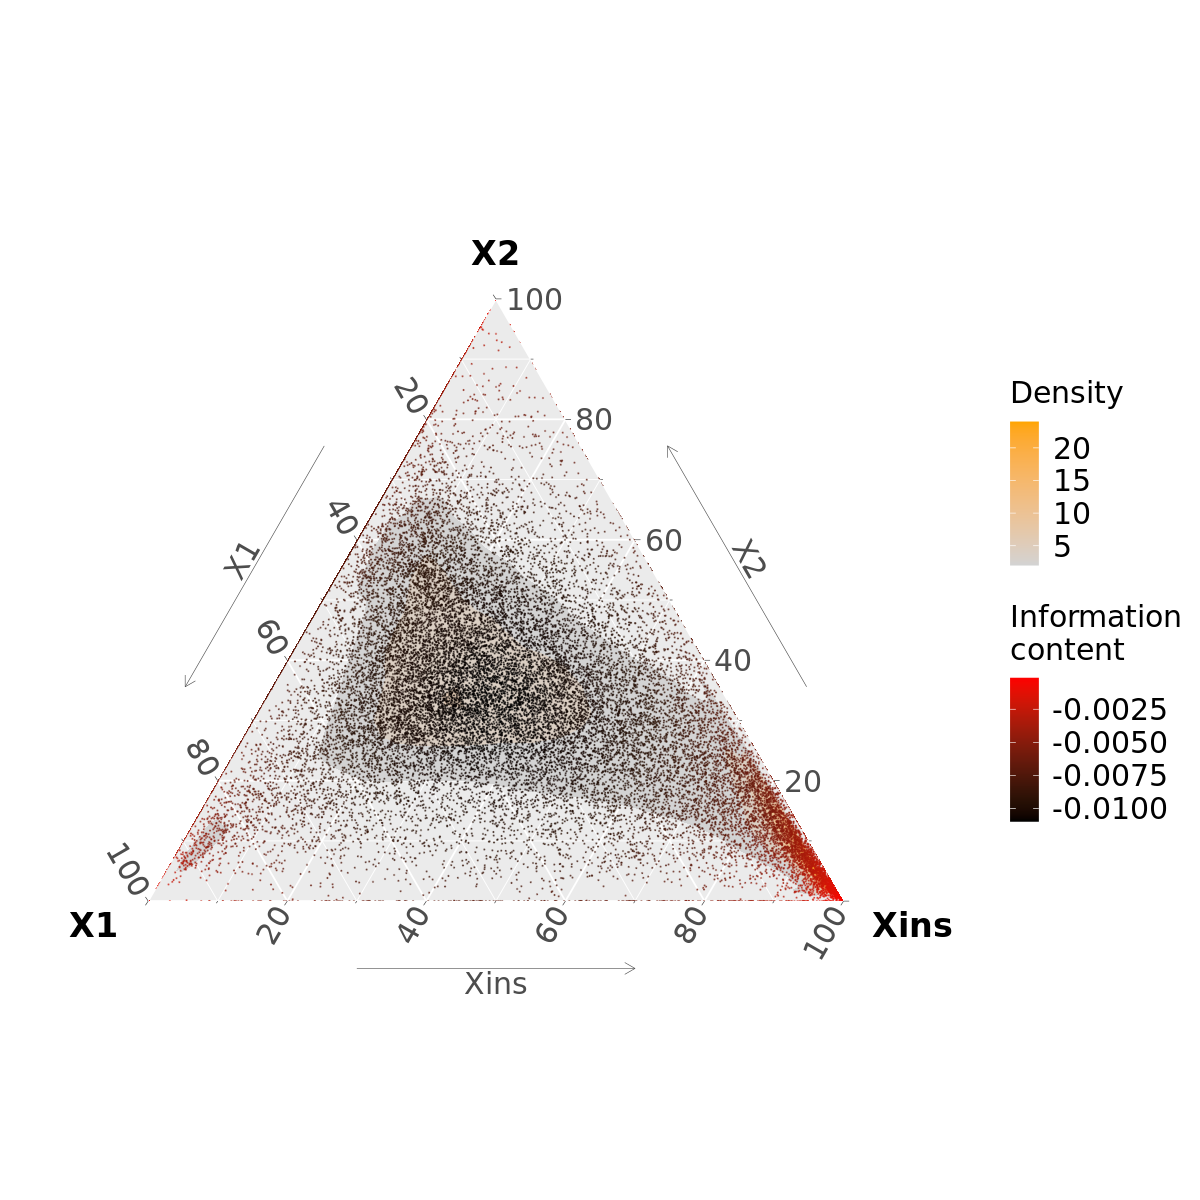

In [8]:
options(repr.plot.width = 10, repr.plot.height = 10)
plot <- ggtern(data=FACS_prop, aes(X1.prop,X2.prop,Xins.prop, color=IC))
plot <- plot + stat_density_tern(geom='polygon', n = 100, aes(fill  = ..level..), bdl=0.01)
plot <- plot + scale_fill_gradient(name="Density", low = "lightgrey",high = "orange")
plot <- plot + geom_point(size=0.0001, alpha=0.5)
plot <- plot + scale_size(name="Information\ncontent", range = c(0, 2.5))
plot <- plot + Tlab("X2") + Llab("X1") + Rlab("Xins")
plot <- plot + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text=element_text(size=18), axis.title=element_text(size=20,face="bold"), legend.title=element_text(size=18), legend.text=element_text(size=18))
plot <- plot + theme_showarrows()
#plot <- plot + geom_Rline(Rintercept=0.5, colour="red4") + geom_Lline(Lintercept=0.5, colour="red4") + geom_Tline(Tintercept=0.5, colour="red4")
#plot <- plot + geom_Rline(Rintercept=0, colour="black") + geom_Lline(Lintercept=0.0, colour="black") + geom_Tline(Tintercept=0.0, colour="black")
plot <- plot + scale_color_gradient(name="Information\ncontent", low="black", high="red")
#plot <- plot + ggtitle("Ternary plot of FACS expression of \n potential transcription factors")
plot

Warning message:
“Removed 432 rows containing missing values (geom_point).”


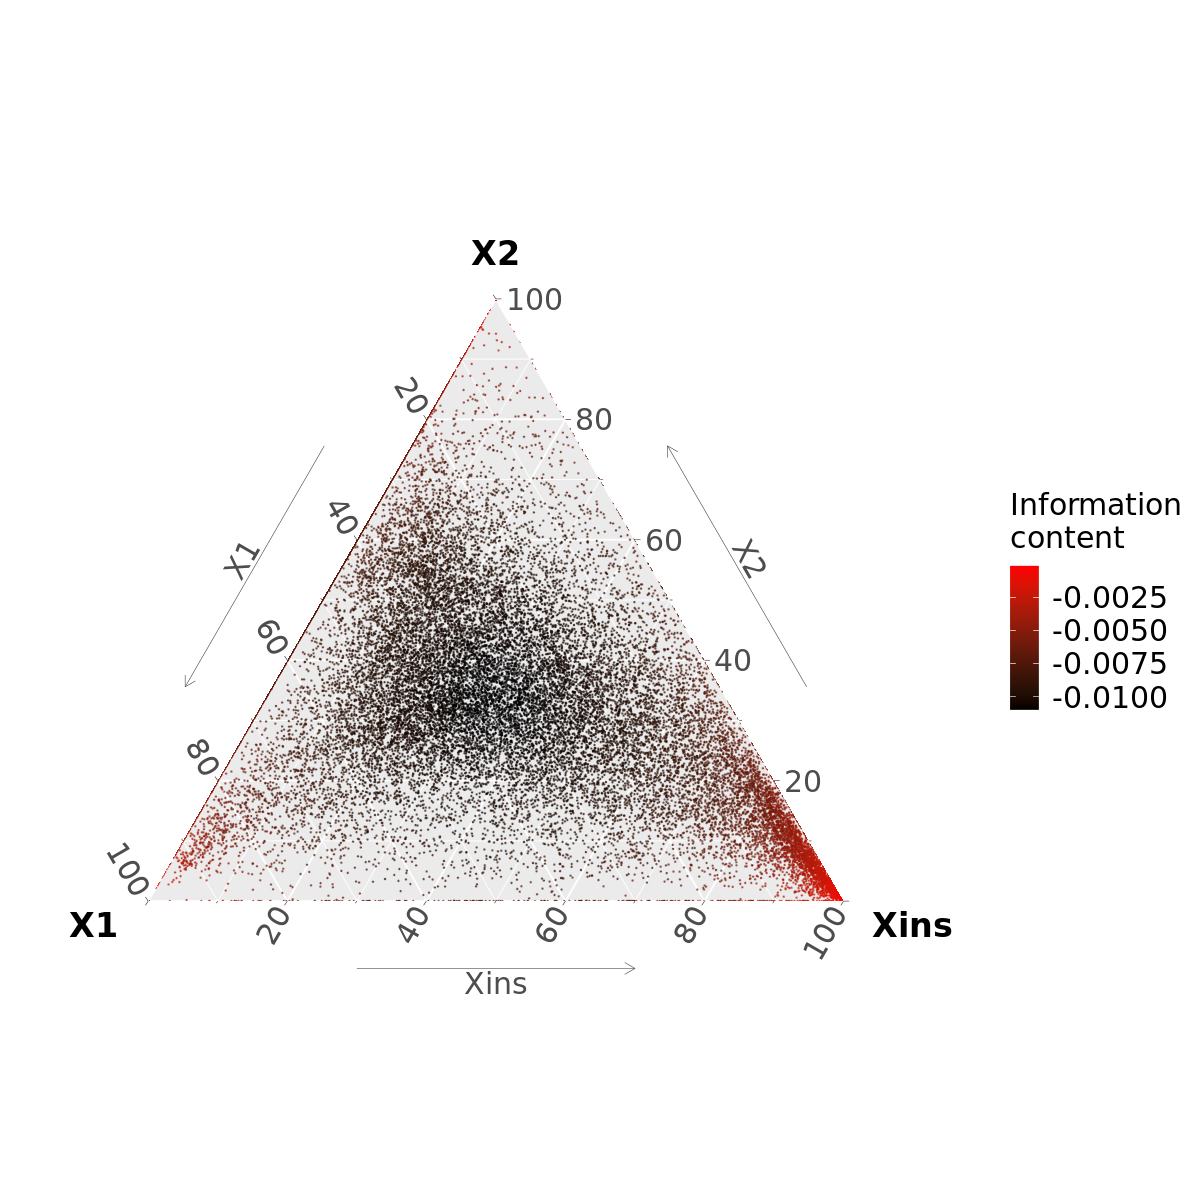

In [12]:
options(repr.plot.width = 10, repr.plot.height = 10)
plot <- ggtern(data=FACS_prop, aes(X1.prop,X2.prop,Xins.prop, color=IC))
#plot <- plot + stat_density_tern(geom='polygon', n = 100, aes(fill  = ..level..), bdl=0.01)
#plot <- plot + scale_fill_gradient(name="Density", low = "lightgrey",high = "orange")
plot <- plot + geom_point(size=0.1, alpha=0.5)
plot <- plot + scale_size(name="Information\ncontent", range = c(0, 2.5))
plot <- plot + Tlab("X2") + Llab("X1") + Rlab("Xins")
plot <- plot + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text=element_text(size=18), axis.title=element_text(size=20,face="bold"), legend.title=element_text(size=18), legend.text=element_text(size=18))
plot <- plot + theme_showarrows()
#plot <- plot + geom_Rline(Rintercept=0.5, colour="red4") + geom_Lline(Lintercept=0.5, colour="red4") + geom_Tline(Tintercept=0.5, colour="red4")
#plot <- plot + geom_Rline(Rintercept=0, colour="black") + geom_Lline(Lintercept=0.0, colour="black") + geom_Tline(Tintercept=0.0, colour="black")
plot <- plot + scale_color_gradient(name="Information\ncontent", low="black", high="red")
#plot <- plot + ggtitle("Ternary plot of FACS expression of \n potential transcription factors")
plot

Warning message:
“Removed 432 rows containing non-finite values (stat_density_tern).”
Warning message:
“Removed 4528 rows containing non-finite values (StatDensityTern).”


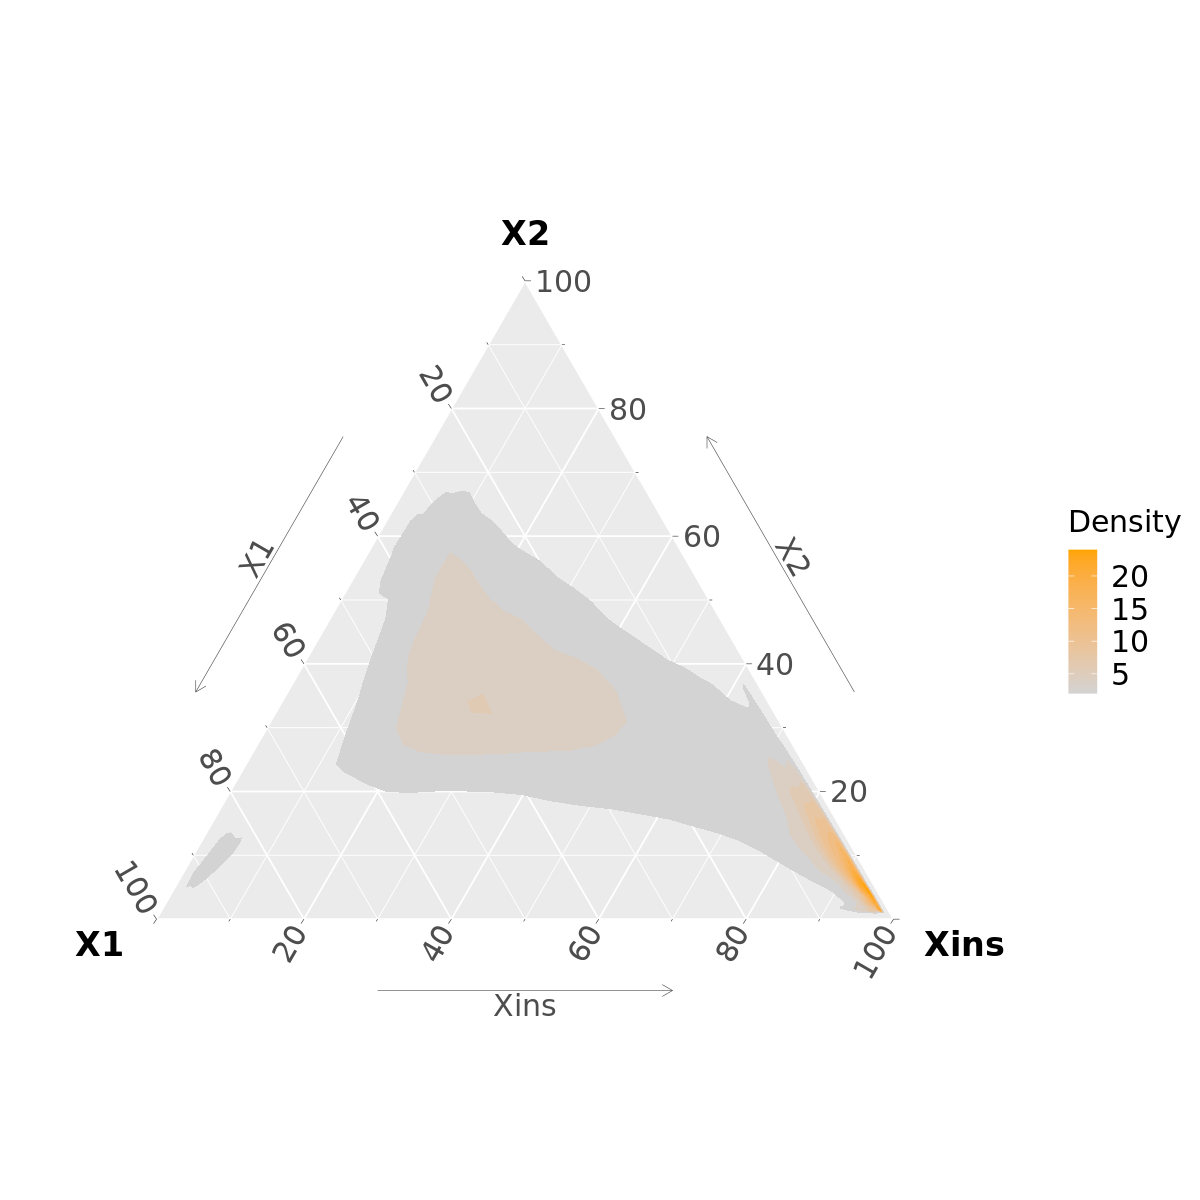

In [14]:
options(repr.plot.width = 10, repr.plot.height = 10)
plot <- ggtern(data=FACS_prop, aes(X1.prop,X2.prop,Xins.prop, color=IC))
plot <- plot + stat_density_tern(geom='polygon', n = 100, aes(fill  = ..level..), bdl=0.01)
plot <- plot + scale_fill_gradient(name="Density", low = "lightgrey",high = "orange")
#plot <- plot + geom_point(size=0.1, alpha=0.5)
plot <- plot + scale_size(name="Information\ncontent", range = c(0, 2.5))
plot <- plot + Tlab("X2") + Llab("X1") + Rlab("Xins")
plot <- plot + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text=element_text(size=18), axis.title=element_text(size=20,face="bold"), legend.title=element_text(size=18), legend.text=element_text(size=18))
plot <- plot + theme_showarrows()
#plot <- plot + geom_Rline(Rintercept=0.5, colour="red4") + geom_Lline(Lintercept=0.5, colour="red4") + geom_Tline(Tintercept=0.5, colour="red4")
#plot <- plot + geom_Rline(Rintercept=0, colour="black") + geom_Lline(Lintercept=0.0, colour="black") + geom_Tline(Tintercept=0.0, colour="black")
plot <- plot + scale_color_gradient(name="Information\ncontent", low="black", high="red")
#plot <- plot + ggtitle("Ternary plot of FACS expression of \n potential transcription factors")
plot

## 2.4 Transcripts per gene

In [1]:
counts = read.csv("/hydra/sexual_genome_annotation_files/ncrna_Neiro/genetranscriptcounts.csv")

Warning message:
“Removed 27 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 3 rows containing missing values (geom_bar).”


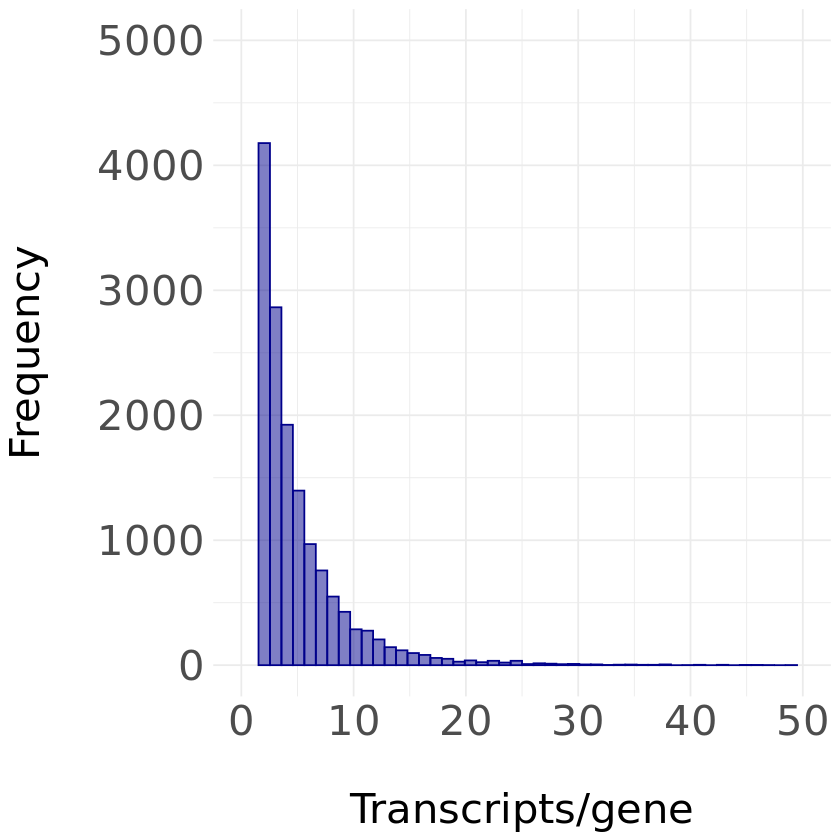

In [11]:
library(ggplot2)
options(repr.plot.width = 7.0, repr.plot.height = 7.0)
p = ggplot(counts, aes(x=Counts))+geom_histogram(col="darkblue", fill="darkblue", alpha = 0.5, bins=50)+theme_minimal()+ylim(0, 5000)+xlim(0,50)
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.position="none", legend.title=element_text(), legend.text=element_text(size=25))
p = p + xlab("\nTranscripts/gene")+ylab("Frequency\n")
p

# 3. Gene ontology analysis of new coding transcripts

## 3.1 GO analysis

A GO analysis was performed to compare the GOs of new transcripts to the GOs of old transcripts.

In [3]:
library(topGO)

In [4]:
new.GO = read.csv("/drives/raid/AboobakerLab/jakke/GO/interpro/ncrna_new_coding_May2021.GO.tab", sep="\t", header=FALSE)
all.GO = read.csv("/drives/raid/AboobakerLab/jakke/GO/interpro/ncrna_coding_May2021.GO.tab", sep="\t", header=FALSE)

In [5]:
nrow(new.GO)
nrow(all.GO)

[1] 731

[1] 11925

In [6]:
geneID2GO = readMappings(file="/drives/raid/AboobakerLab/jakke/GO/interpro/ncrna_coding_May2021.GO.tab")
gene_all_names = names(geneID2GO)

In [7]:
gene_ncrna_map = readMappings(file="/drives/raid/AboobakerLab/jakke/GO/interpro/ncrna_new_coding_May2021.GO.tab")
gene_ncrna_names = names(gene_ncrna_map)

In [17]:
geneList = as.factor(as.integer(gene_all_names %in% gene_ncrna_names))
names(geneList) <- gene_all_names
str(geneList)

 Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 - attr(*, "names")= chr [1:11925] "MSTRG.10475.5" "MSTRG.10475.1" "MSTRG.6511.1" "MSTRG.22035.25" ...


The GO analysis for biological processes was performed: 

In [18]:
BP_GOdata <- new("topGOdata", description = "Simple session", ontology = "BP",
 allGenes = geneList, annot = annFUN.gene2GO,  gene2GO = geneID2GO)
resultFisher <- runTest(BP_GOdata, algorithm = "classic", statistic = "fisher")
Res_BP <- GenTable(BP_GOdata, classicFisher = resultFisher, ranksOf = "classicFisher", topNodes = 10)
Res_BP


Building most specific GOs .....

	( 393 GO terms found. )


Build GO DAG topology ..........

	( 1309 GO terms and 2675 relations. )


Annotating nodes ...............

	( 5170 genes annotated to the GO terms. )


			 -- Classic Algorithm -- 

		 the algorithm is scoring 558 nontrivial nodes
		 parameters: 
			 test statistic: fisher



GO.ID      Term                                        Annotated Significant
1  GO:0006476 protein deacetylation                         8        8         
2  GO:0016575 histone deacetylation                         8        8         
3  GO:0035601 protein deacylation                           8        8         
4  GO:0098732 macromolecule deacylation                     8        8         
5  GO:0006470 protein dephosphorylation                    77       20         
6  GO:0060255 regulation of macromolecule metabolic pr... 292       41         
7  GO:0019222 regulation of metabolic process             293       41         
8  GO:0016311 dephosphorylation                           117       22         
9  GO:0032774 RNA biosynthetic process                    330       44         
10 GO:0006351 transcription, DNA-templated                325       43         
   Expected classicFisher
1   0.56    5.1e-10      
2   0.56    5.1e-10      
3   0.56    5.1e-10      
4   0.56    5.1e-10      
5   5.36    1.6e-07      
6  20.33    8.3e-06      
7  20.40    9.0e-06      
8   8.15    1.4e-05      
9  22.98    1.5e-05      
10 22.63    2.3e-05

The GO analysis for cellular components was performed: 

In [43]:
CC_GOdata <- new("topGOdata", description = "Simple session", ontology = "CC",
 allGenes = geneList, annot = annFUN.gene2GO,  gene2GO = geneID2GO)
resultFisher <- runTest(CC_GOdata, algorithm = "classic", statistic = "fisher")
Res_CC <- GenTable(CC_GOdata, classicFisher = resultFisher, ranksOf = "classicFisher", topNodes = 10)
Res_CC


Building most specific GOs .....

	( 158 GO terms found. )


Build GO DAG topology ..........

	( 350 GO terms and 633 relations. )


Annotating nodes ...............

	( 2777 genes annotated to the GO terms. )


			 -- Classic Algorithm -- 

		 the algorithm is scoring 127 nontrivial nodes
		 parameters: 
			 test statistic: fisher



GO.ID      Term                                        Annotated Significant
1  GO:0005743 mitochondrial inner membrane                26        10         
2  GO:0019866 organelle inner membrane                    26        10         
3  GO:0005740 mitochondrial envelope                      40        12         
4  GO:0034703 cation channel complex                       4         4         
5  GO:0098800 inner mitochondrial membrane protein com... 19         8         
6  GO:0005739 mitochondrion                               64        15         
7  GO:0098798 mitochondrial protein complex               26         9         
8  GO:0005576 extracellular region                        43        11         
9  GO:0031966 mitochondrial membrane                      37        10         
10 GO:0031967 organelle envelope                          52        12         
   Expected classicFisher
1  1.98     9.4e-06      
2  1.98     9.4e-06      
3  3.04     2.3e-05      
4  0.30     3.2e-05      
5  1.44     3.5e-05      
6  4.86     5.5e-05      
7  1.98     7.1e-05      
8  3.27     0.00025      
9  2.81     0.00029      
10 3.95     0.00037

The GO analysis of molecular processes was performed:

In [42]:
MP_GOdata <- new("topGOdata", description = "Simple session", ontology = "MF",
 allGenes = geneList, annot = annFUN.gene2GO,  gene2GO = geneID2GO)
resultFisher <- runTest(MP_GOdata, algorithm = "classic", statistic = "fisher")
Res_MP <- GenTable(MP_GOdata, classicFisher = resultFisher, ranksOf = "classicFisher", topNodes = 10)
Res_MP


Building most specific GOs .....

	( 480 GO terms found. )


Build GO DAG topology ..........

	( 779 GO terms and 1012 relations. )


Annotating nodes ...............

	( 10024 genes annotated to the GO terms. )


			 -- Classic Algorithm -- 

		 the algorithm is scoring 348 nontrivial nodes
		 parameters: 
			 test statistic: fisher



GO.ID      Term                                        Annotated Significant
1  GO:0016714 oxidoreductase activity, acting on paire... 18        15         
2  GO:0004497 monooxygenase activity                      25        15         
3  GO:0005347 ATP transmembrane transporter activity       9         9         
4  GO:1901505 carbohydrate derivative transmembrane tr... 22        13         
5  GO:0000295 adenine nucleotide transmembrane transpo... 10         9         
6  GO:0005346 purine ribonucleotide transmembrane tran... 10         9         
7  GO:0015215 nucleotide transmembrane transporter act... 10         9         
8  GO:0015216 purine nucleotide transmembrane transpor... 10         9         
9  GO:0015605 organophosphate ester transmembrane tran... 10         9         
10 GO:0015932 nucleobase-containing compound transmemb... 24        13         
   Expected classicFisher
1  1.08     2.6e-16      
2  1.50     7.2e-13      
3  0.54     9.3e-12      
4  1.32     3.4e-11      
5  0.60     8.8e-11      
6  0.60     8.8e-11      
7  0.60     8.8e-11      
8  0.60     8.8e-11      
9  0.60     8.8e-11      
10 1.44     1.5e-10

## 3.2 GO plots

### 3.2.1 Biological process

In [10]:
Res_BP$classicFisher
y=as.numeric(Res_BP$classicFisher)
#y[1:3] = 1e-30
y = -log10(y)
number = Res_BP$Significant

[1] "5.3e-10" "5.3e-10" "5.3e-10" "5.3e-10" "1.7e-07" "9.4e-06" "1.0e-05"
 [8] "1.5e-05" "1.7e-05" "2.5e-05"

In [11]:
Res_BP$Term[6] = 'regulation of macromolecule\nmetabolic process'
Res_BP$Term[10] = 'regulation of nitrogen compound\nmetabolic process'

In [21]:
Res_BP

GO.ID      Term                                               Annotated
1  GO:0006476 protein deacetylation                                8      
2  GO:0016575 histone deacetylation                                8      
3  GO:0035601 protein deacylation                                  8      
4  GO:0098732 macromolecule deacylation                            8      
5  GO:0006470 protein dephosphorylation                           77      
6  GO:0060255 regulation of macromolecule\nmetabolic process     292      
7  GO:0019222 regulation of metabolic process                    293      
8  GO:0016311 dephosphorylation                                  117      
9  GO:0032774 RNA biosynthetic process                           330      
10 GO:0051171 regulation of nitrogen compound\nmetabolic process 283      
   Significant Expected classicFisher
1   8           0.56    5.3e-10      
2   8           0.56    5.3e-10      
3   8           0.56    5.3e-10      
4   8           0.56    5.3e-10      
5  20           5.38    1.7e-07      
6  41          20.41    9.4e-06      
7  41          20.48    1.0e-05      
8  22           8.18    1.5e-05      
9  44          23.06    1.7e-05      
10 39          19.78    2.5e-05

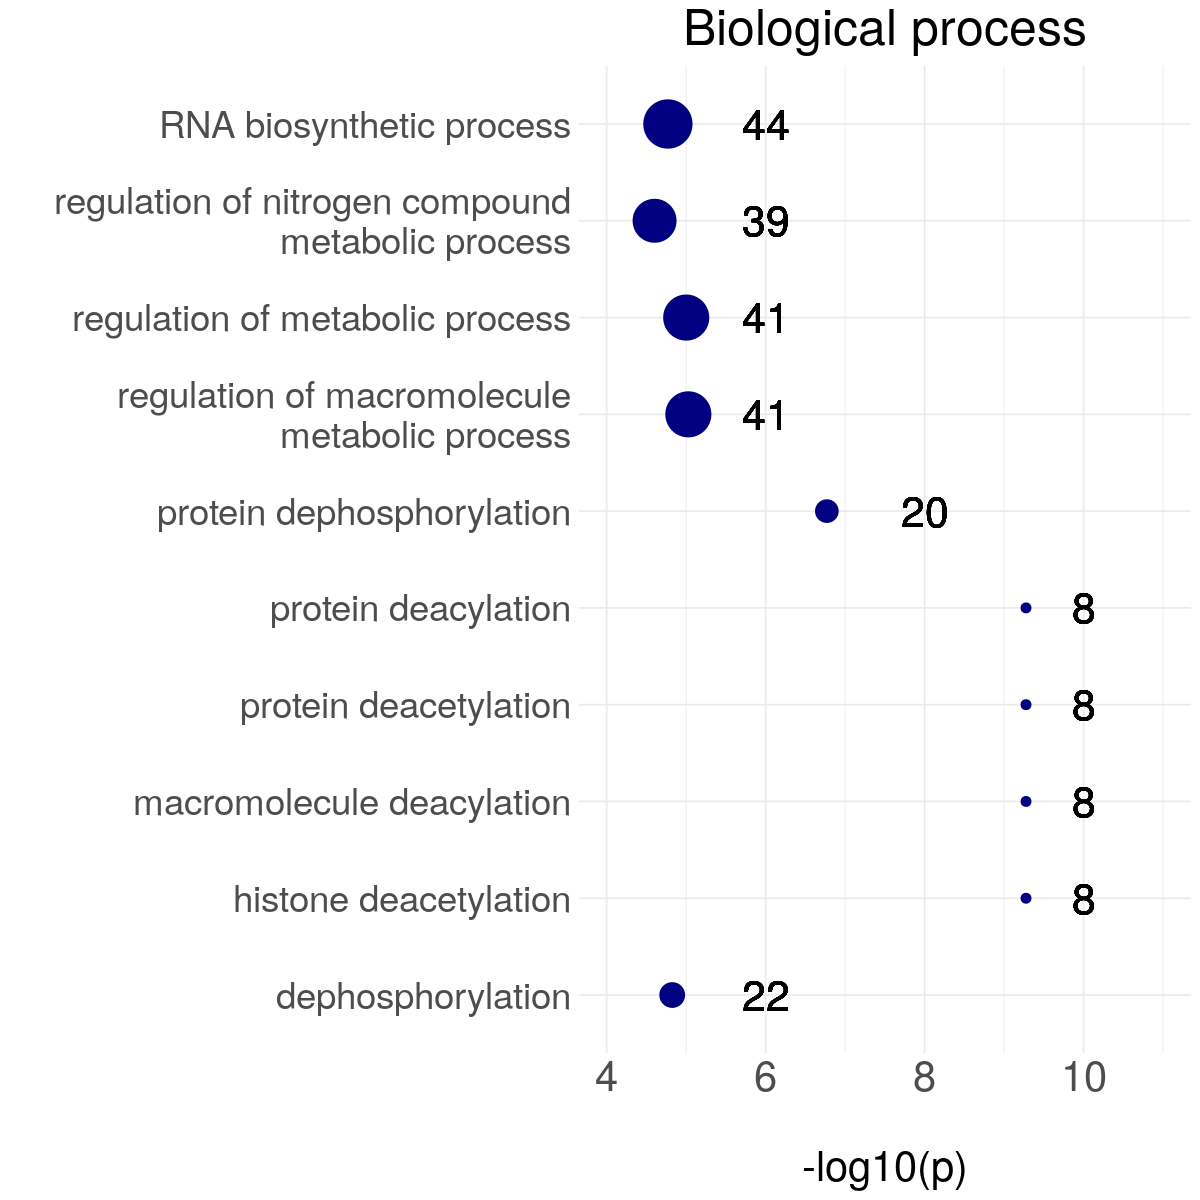

In [26]:
# Libraries
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 10)
# Create data
data <- data.frame(
    x=Res_BP$Term, 
    y=y,
    number=number
)

# Horizontal version
p = ggplot(data, aes(x=x, y=y))
p = p + geom_point( color="navyblue", size=number*0.3) + theme_minimal() + coord_flip()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=22), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=30), legend.text=element_text(size=30))
p = p + xlab(" ") + ylab("\n-log10(p)")
p = p + ggtitle("Biological process")+ylim(4,11)
p = p + geom_text(aes(label=c("44"), y=6, x=10), size = 9, col="black")
p = p + geom_text(aes(label=c("39"), y=6, x=9), size = 9, col="black")
p = p + geom_text(aes(label=c("41"), y=6, x=8), size = 9, col="black")
p = p + geom_text(aes(label=c("41"), y=6, x=7), size = 9, col="black")
p = p + geom_text(aes(label=c("20"), y=8, x=6), size = 9, col="black")
p = p + geom_text(aes(label=c("22"), y=6, x=1), size = 9, col="black")
p = p + geom_text(aes(label=c("8"), y=10, x=5), size = 9, col="black")
p = p + geom_text(aes(label=c("8"), y=10, x=4), size = 9, col="black")
p = p + geom_text(aes(label=c("8"), y=10, x=3), size = 9, col="black")
p = p + geom_text(aes(label=c("8"), y=10, x=2), size = 9, col="black")
p

**Fig-1-3-5** *GO analysis for biological processes.* 

### 3.2.2 Molecular process

In [29]:
Res_MP$classicFisher
y=as.numeric(Res_MP$classicFisher)
#y[1:5] = 1e-30
y = -log10(y)
number = Res_MP$Significant

[1] "2.6e-16" "7.2e-13" "9.3e-12" "3.4e-11" "8.8e-11" "8.8e-11" "8.8e-11"
 [8] "8.8e-11" "8.8e-11" "1.5e-10"

In [30]:
Res_MP$Term

[1] "oxidoreductase activity"                                
 [2] "monooxygenase activity"                                 
 [3] "ATP transmembrane\ntransporter activity"                
 [4] "carbohydrate derivative\ntransmembrane transport"       
 [5] "adenine nucleotide\ntransmembrane transport"            
 [6] "purine ribonucleotide\ntransmembrane transport"         
 [7] "nucleotide transmembrane\ntransporter activity"         
 [8] "purine nucleotide\ntransmembrane transport"             
 [9] "organophosphate ester\ntransmembrane transport"         
[10] "nucleobase-containing compound\ntransmembrane transport"

In [32]:
Res_MP$Term[1] = 'oxidoreductase activity'
Res_MP$Term[2] = 'monooxygenase activity'
Res_MP$Term[3] = "ATP transmembrane\ntransporter activity"
Res_MP$Term[4] = "carbohydrate derivative\ntransmembrane transport"
Res_MP$Term[5] = "adenine nucleotide\ntransmembrane transport"
Res_MP$Term[6] = "purine ribonucleotide\ntransmembrane transport"
Res_MP$Term[7] = "nucleotide transmembrane\ntransporter activity"
Res_MP$Term[8] = "purine nucleotide\ntransmembrane transport"
Res_MP$Term[9] = "organophosphate ester\ntransmembrane transport"
Res_MP$Term[10] = "nucleobase-containing compound\ntransmembrane transport"

In [35]:
Res_MP

GO.ID      Term                                                    Annotated
1  GO:0016714 oxidoreductase activity                                 18       
2  GO:0004497 monooxygenase activity                                  25       
3  GO:0005347 ATP transmembrane\ntransporter activity                  9       
4  GO:1901505 carbohydrate derivative\ntransmembrane transport        22       
5  GO:0000295 adenine nucleotide\ntransmembrane transport             10       
6  GO:0005346 purine ribonucleotide\ntransmembrane transport          10       
7  GO:0015215 nucleotide transmembrane\ntransporter activity          10       
8  GO:0015216 purine nucleotide\ntransmembrane transport              10       
9  GO:0015605 organophosphate ester\ntransmembrane transport          10       
10 GO:0015932 nucleobase-containing compound\ntransmembrane transport 24       
   Significant Expected classicFisher
1  15          1.08     2.6e-16      
2  15          1.50     7.2e-13      
3   9          0.54     9.3e-12      
4  13          1.32     3.4e-11      
5   9          0.60     8.8e-11      
6   9          0.60     8.8e-11      
7   9          0.60     8.8e-11      
8   9          0.60     8.8e-11      
9   9          0.60     8.8e-11      
10 13          1.44     1.5e-10

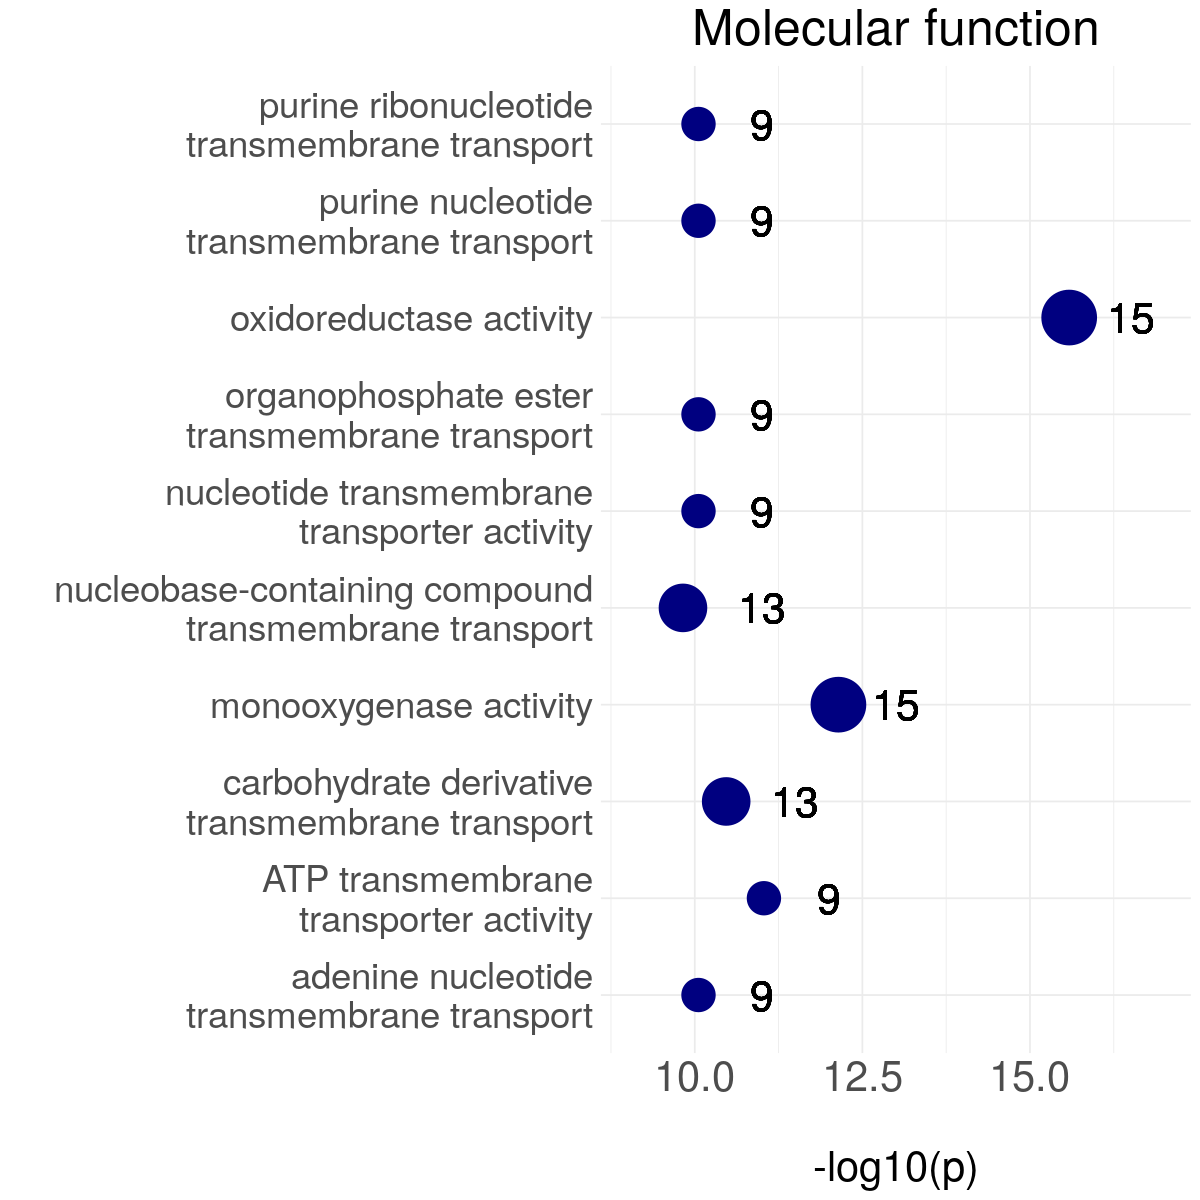

In [40]:
# Libraries
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 10)
# Create data
data <- data.frame(
    x=Res_MP$Term, 
    y=y,
    number=number
)

# Horizontal version
p = ggplot(data, aes(x=x, y=y))
p = p + geom_point(color="navyblue", size=number) + theme_minimal() + coord_flip()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=22), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=30), legend.text=element_text(size=30))
p = p + xlab(" ") + ylab("\n-log10(p)")
p = p + ggtitle("Molecular function")+ylim(9,17)
p = p + geom_text(aes(label=c("9"), y=11, x=10), size = 9, col="black")
p = p + geom_text(aes(label=c("9"), y=11, x=9), size = 9, col="black")
p = p + geom_text(aes(label=c("15"), y=16.5, x=8), size = 9, col="black")
p = p + geom_text(aes(label=c("9"), y=11, x=7), size = 9, col="black")
p = p + geom_text(aes(label=c("9"), y=11, x=6), size = 9, col="black")
p = p + geom_text(aes(label=c("13"), y=11, x=5), size = 9, col="black")
p = p + geom_text(aes(label=c("15"), y=13, x=4), size = 9, col="black")
p = p + geom_text(aes(label=c("13"), y=11.5, x=3), size = 9, col="black")
p = p + geom_text(aes(label=c("9"), y=12, x=2), size = 9, col="black")
p = p + geom_text(aes(label=c("9"), y=11, x=1), size = 9, col="black")
p

**Fig-1-3-6** *GO analysis for molecular function*

### 3.2.3 Cellular component

In [44]:
Res_CC$classicFisher
y=as.numeric(Res_CC$classicFisher)
#y[1] = 1e-30
y = -log10(y)
number = Res_CC$Significant

[1] "9.4e-06" "9.4e-06" "2.3e-05" "3.2e-05" "3.5e-05" "5.5e-05" "7.1e-05"
 [8] "0.00025" "0.00029" "0.00037"

In [45]:
Res_CC$Term

[1] "mitochondrial inner membrane"               
 [2] "organelle inner membrane"                   
 [3] "mitochondrial envelope"                     
 [4] "cation channel complex"                     
 [5] "inner mitochondrial membrane protein com..."
 [6] "mitochondrion"                              
 [7] "mitochondrial protein complex"              
 [8] "extracellular region"                       
 [9] "mitochondrial membrane"                     
[10] "organelle envelope"

In [46]:
Res_CC$Term[5] = "inner mitochondrial\nmembrane protein complex"

In [48]:
Res_CC

GO.ID      Term                                          Annotated
1  GO:0005743 mitochondrial inner membrane                  26       
2  GO:0019866 organelle inner membrane                      26       
3  GO:0005740 mitochondrial envelope                        40       
4  GO:0034703 cation channel complex                         4       
5  GO:0098800 inner mitochondrial\nmembrane protein complex 19       
6  GO:0005739 mitochondrion                                 64       
7  GO:0098798 mitochondrial protein complex                 26       
8  GO:0005576 extracellular region                          43       
9  GO:0031966 mitochondrial membrane                        37       
10 GO:0031967 organelle envelope                            52       
   Significant Expected classicFisher
1  10          1.98     9.4e-06      
2  10          1.98     9.4e-06      
3  12          3.04     2.3e-05      
4   4          0.30     3.2e-05      
5   8          1.44     3.5e-05      
6  15          4.86     5.5e-05      
7   9          1.98     7.1e-05      
8  11          3.27     0.00025      
9  10          2.81     0.00029      
10 12          3.95     0.00037

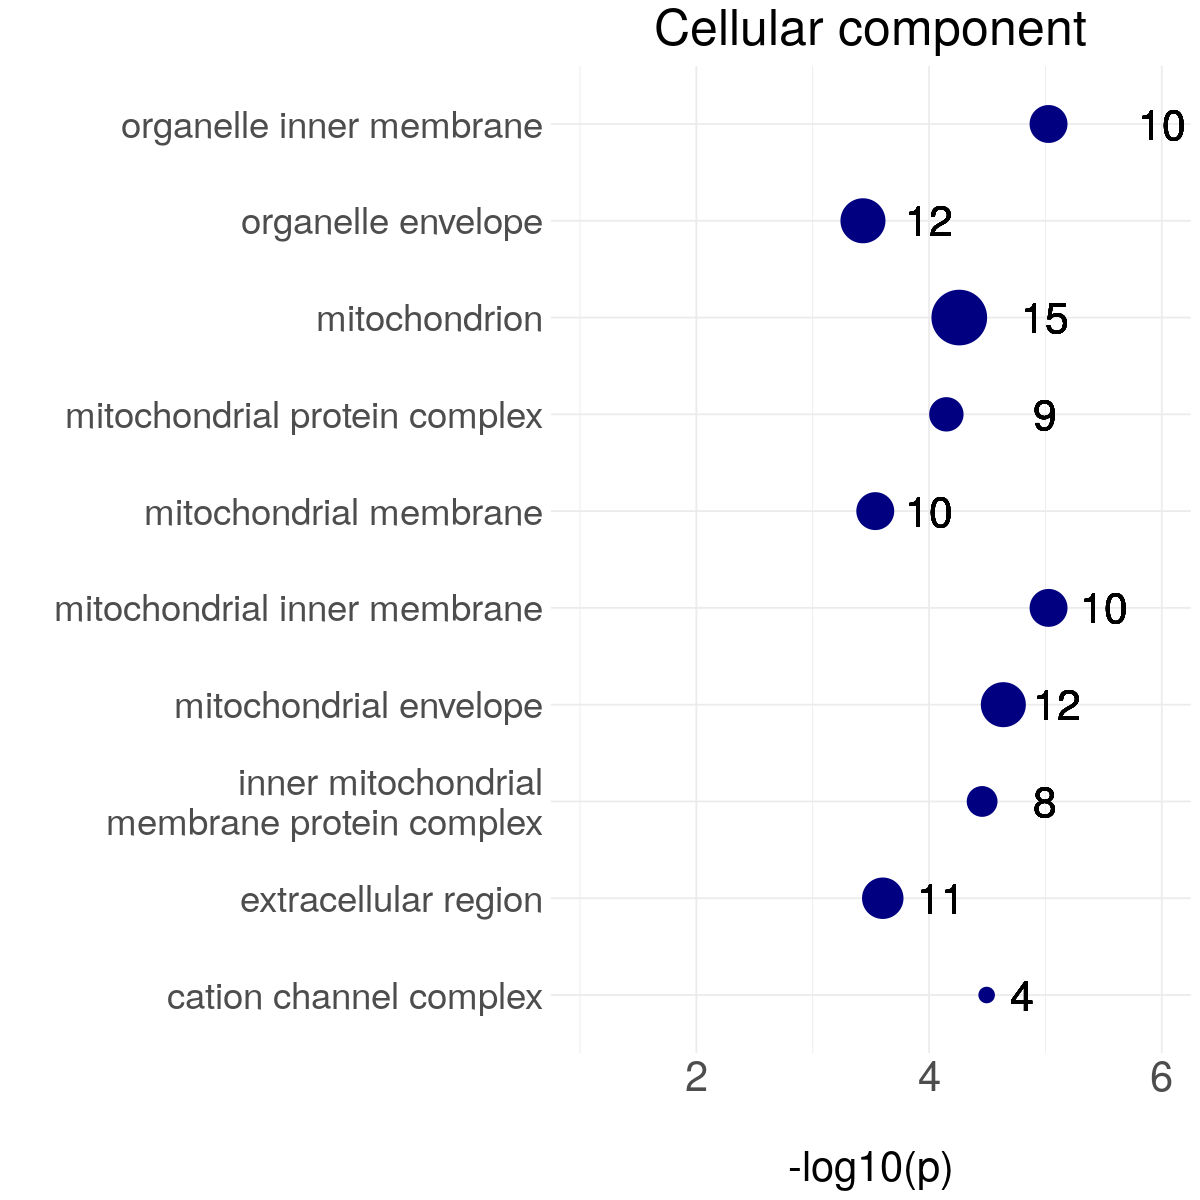

In [58]:
# Libraries
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 10)
# Create data
data <- data.frame(
    x=Res_CC$Term, 
    y=y,
    number=number
)

# Horizontal version
p = ggplot(data, aes(x=x, y=y))
p = p + geom_point(color="navyblue", size=number) + theme_minimal() + coord_flip()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=22), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=30), legend.text=element_text(size=30))
p = p + xlab(" ") + ylab("\n-log10(p)")
p = p + ggtitle("Cellular component")+ylim(1,6)
p = p + geom_text(aes(label=c("10"), y=6, x=10), size = 9, col="black")
p = p + geom_text(aes(label=c("12"), y=4, x=9), size = 9, col="black")
p = p + geom_text(aes(label=c("15"), y=5, x=8), size = 9, col="black")
p = p + geom_text(aes(label=c("9"), y=5, x=7), size = 9, col="black")
p = p + geom_text(aes(label=c("10"), y=4, x=6), size = 9, col="black")
p = p + geom_text(aes(label=c("10"), y=5.5, x=5), size = 9, col="black")
p = p + geom_text(aes(label=c("12"), y=5.1, x=4), size = 9, col="black")
p = p + geom_text(aes(label=c("8"), y=5, x=3), size = 9, col="black")
p = p + geom_text(aes(label=c("11"), y=4.1, x=2), size = 9, col="black")
p = p + geom_text(aes(label=c("4"), y=4.8, x=1), size = 9, col="black")
p

**Fig-1-3-7** *GO analysis for cellular components*

# 4. Homology to Dugesia japonica

In [1]:
5065-273

[1] 4792

In [3]:
6190-136

[1] 6054

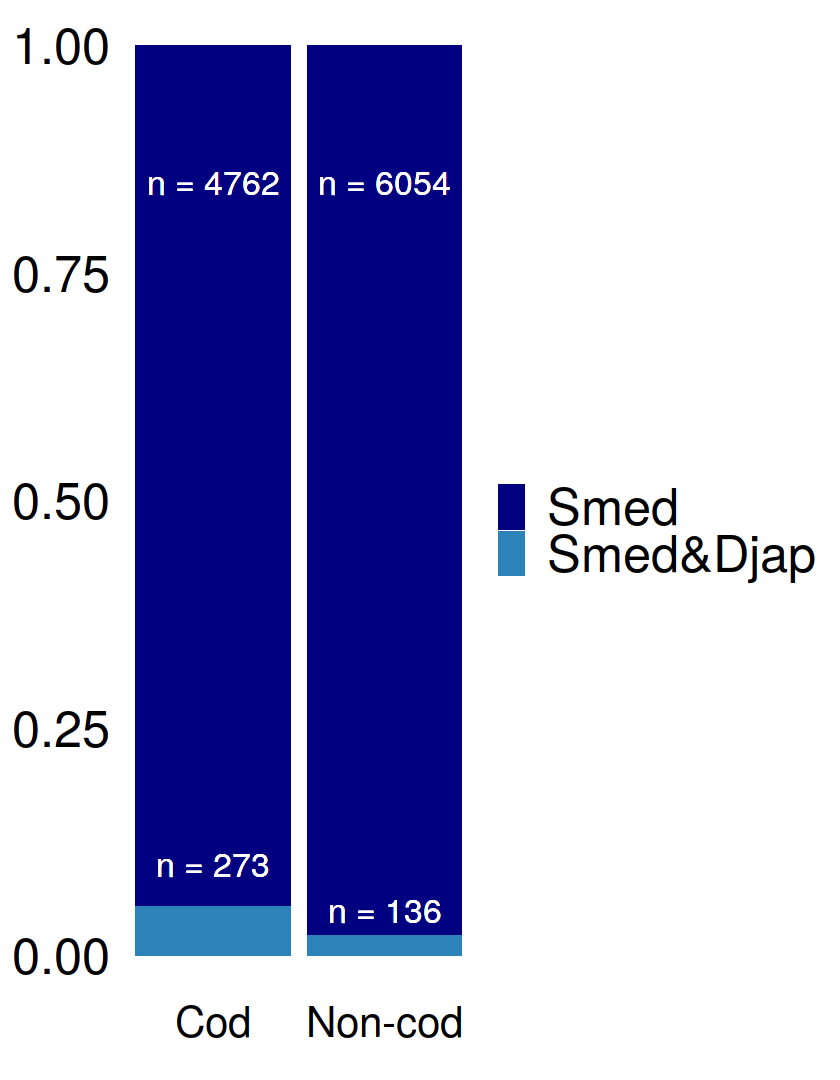

In [14]:
library(ggplot2)
options(repr.plot.width = 7.0, repr.plot.height = 9)
df = data.frame(class=factor(c("Smed", "Smed&Djap"), levels=c("Smed", "Smed&Djap")), value=c(4792, 273, 6054, 136), id = c("Cod", "Cod", "Non-cod", "Non-cod"))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=30))
p = p + scale_fill_manual(name=" ", values=c("navyblue", "#2B83BA", "orange", "lightyellow"))
#p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
#p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
p = p + geom_text(aes(label=c("n = 4762"), y=c(0.85), x=1), size = 7, col="white")
p = p + geom_text(aes(label=c("n = 273"), y=c(0.1), x=1), size = 7, col="white")
p = p + geom_text(aes(label=c("n = 6054"), y=c(0.85), x=2), size = 7, col="white")
p = p + geom_text(aes(label=c("n = 136"), y=c(0.05), x=2), size = 7, col="white")
p

In [1]:
5065-4677

[1] 388

In [1]:
6190-2432

[1] 3758

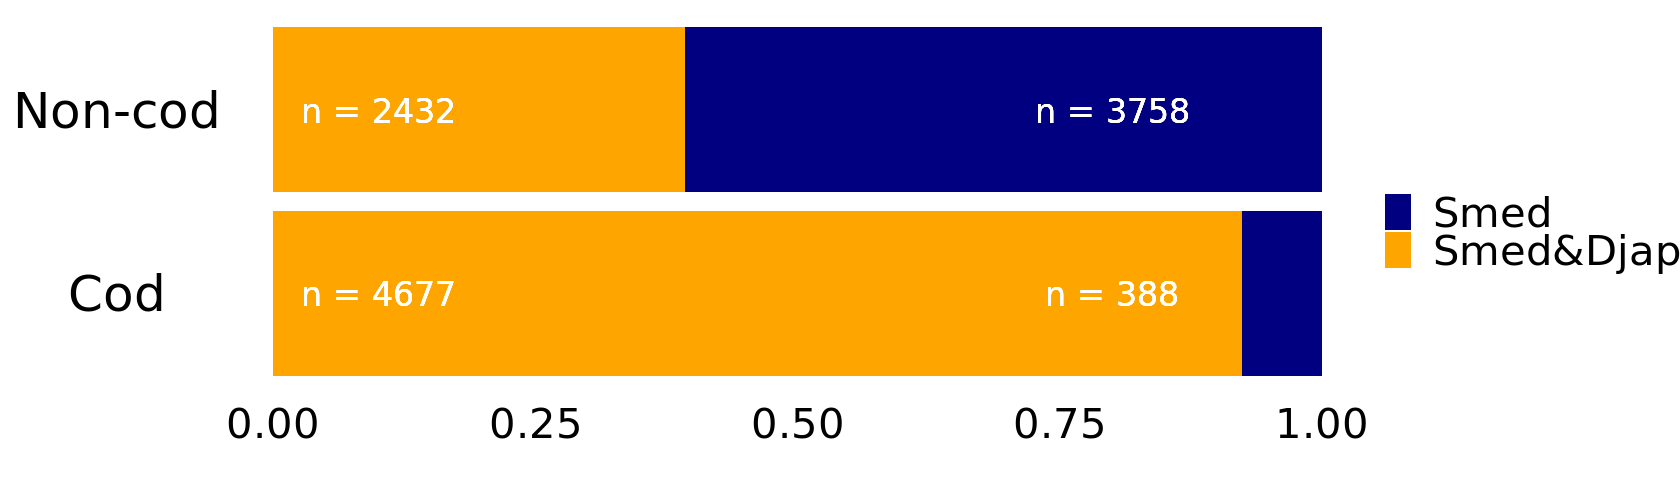

In [6]:
library(ggplot2)
options(repr.plot.width = 14.0, repr.plot.height = 4)
df = data.frame(class=factor(c("Smed", "Smed&Djap"), levels=c("Smed", "Smed&Djap")), value=c(388, 4677, 3758, 2432), id = c("Cod", "Cod", "Non-cod", "Non-cod"))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + scale_fill_manual(name=" ", values=c("navyblue", "orange"))
p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
#p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
p = p + geom_text(aes(label=c("n = 388"), y=c(0.8), x=1), size = 7, col="white")
p = p + geom_text(aes(label=c("n = 4677"), y=c(0.1), x=1), size = 7, col="white")
p = p + geom_text(aes(label=c("n = 3758"), y=c(0.8), x=2), size = 7, col="white")
p = p + geom_text(aes(label=c("n = 2432"), y=c(0.1), x=2), size = 7, col="white")
p

### Transcripts

Frequencies:
* 

In [ ]:
5065, 3398

In [1]:
5065-3398

[1] 1667

In [9]:
4677-3098

[1] 1579

In [10]:
6190-3158

[1] 3032

In [4]:
6190-3758

[1] 2432

In [11]:
3758-3158

[1] 600

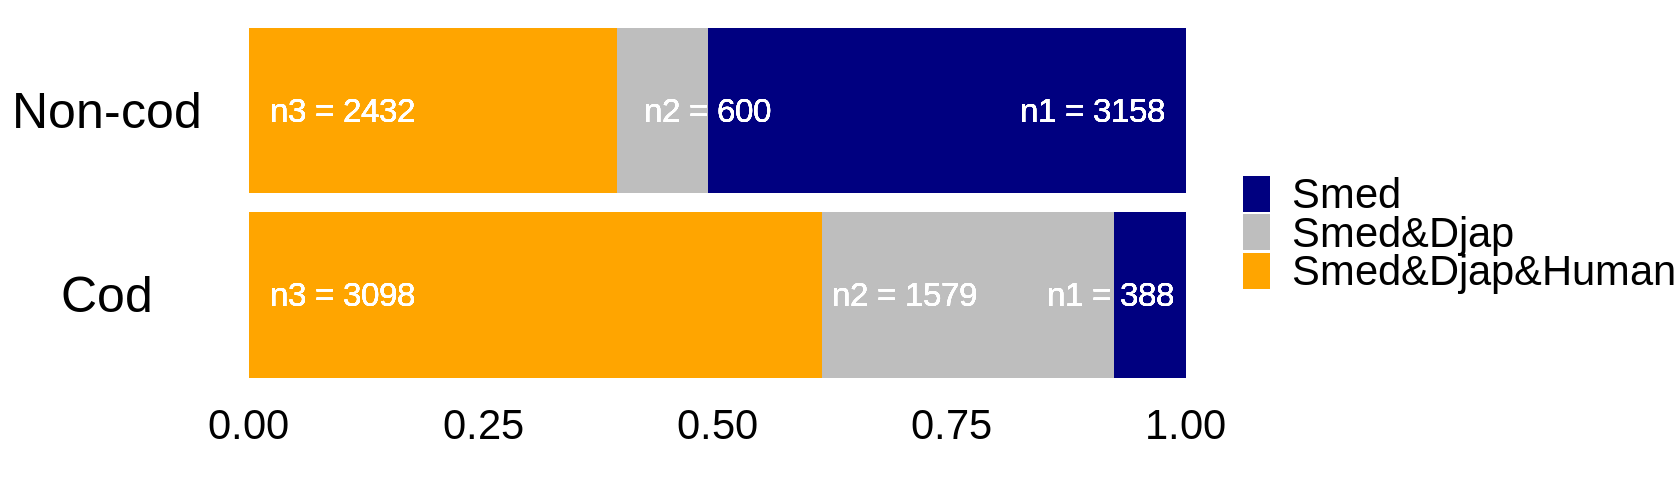

In [13]:
library(ggplot2)
options(repr.plot.width = 14.0, repr.plot.height = 4)
df = data.frame(class=factor(c("Smed", "Smed&Djap", "Smed&Djap&Human"), levels=c("Smed", "Smed&Djap", "Smed&Djap&Human")), value=c(388, 1579, 3098, 3158, 600, 2432), id = c("Cod", "Cod", "Cod", "Non-cod", "Non-cod", "Non-cod"))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + scale_fill_manual(name=" ", values=c("navyblue", "grey", "orange"))
p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
#p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
p = p + geom_text(aes(label=c("n1 = 388"), y=c(0.92), x=1), size = 7, col="white")
p = p + geom_text(aes(label=c("n2 = 1579"), y=c(0.7), x=1), size = 7, col="white")
p = p + geom_text(aes(label=c("n3 = 3098"), y=c(0.1), x=1), size = 7, col="white")
p = p + geom_text(aes(label=c("n1 = 3158"), y=c(0.9), x=2), size = 7, col="white")
p = p + geom_text(aes(label=c("n2 = 600"), y=c(0.49), x=2), size = 7, col="white")
p = p + geom_text(aes(label=c("n3 = 2432"), y=c(0.1), x=2), size = 7, col="white")
p

### Genes

**Coding**
* $S \cup D \cup H$: All coding genes: 3121
* $D \cup H$: Coding genes in Djap or human: 3076
* $H$: Human 2278 
* $S$: Smed 45
* $S \cup D$: 849

**Non-coding**
* All non-coding genes: 4485
* Non-coding: 4399
* Human non-coding loci: 2750

* All non-coding genes: 4485
* Djap or human: 4062
* Human: 27

In [3]:
print("All new loci")
print(3312+4485)

[1] "All new loci"
[1] 7797


In [6]:
3121-3076

[1] 45

In [7]:
3121-2278

[1] 843

In [1]:
4485-4399

[1] 86

In [2]:
4399-2750

[1] 1649

In [1]:
4485-4062

[1] 423

In [2]:
4062-27

[1] 4035

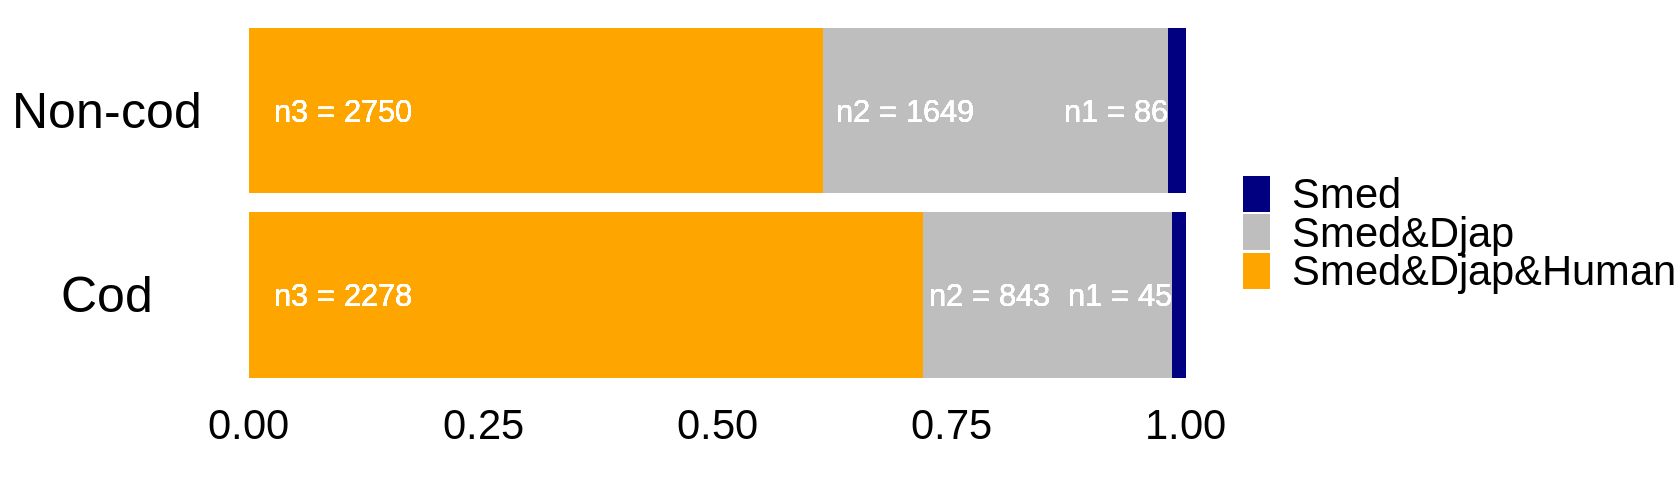

In [9]:
library(ggplot2)
options(repr.plot.width = 14.0, repr.plot.height = 4)
df = data.frame(class=factor(c("Smed", "Smed&Djap", "Smed&Djap&Human"), levels=c("Smed", "Smed&Djap", "Smed&Djap&Human")), value=c(45, 843, 2278, 86, 1649, 2750), id = c("Cod", "Cod", "Cod", "Non-cod", "Non-cod", "Non-cod"))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + scale_fill_manual(name=" ", values=c("navyblue", "grey", "orange"))
p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
#p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
p = p + geom_text(aes(label=c("n1 = 45"), y=c(0.93), x=1), size = 6.5, col="white")
p = p + geom_text(aes(label=c("n2 = 843"), y=c(0.79), x=1), size = 6.5, col="white")
p = p + geom_text(aes(label=c("n3 = 2278"), y=c(0.1), x=1), size = 6.5, col="white")
p = p + geom_text(aes(label=c("n1 = 86"), y=c(0.925), x=2), size = 6.5, col="white")
p = p + geom_text(aes(label=c("n2 = 1649"), y=c(0.7), x=2), size = 6.5, col="white")
p = p + geom_text(aes(label=c("n3 = 2750"), y=c(0.1), x=2), size = 6.5, col="white")
p

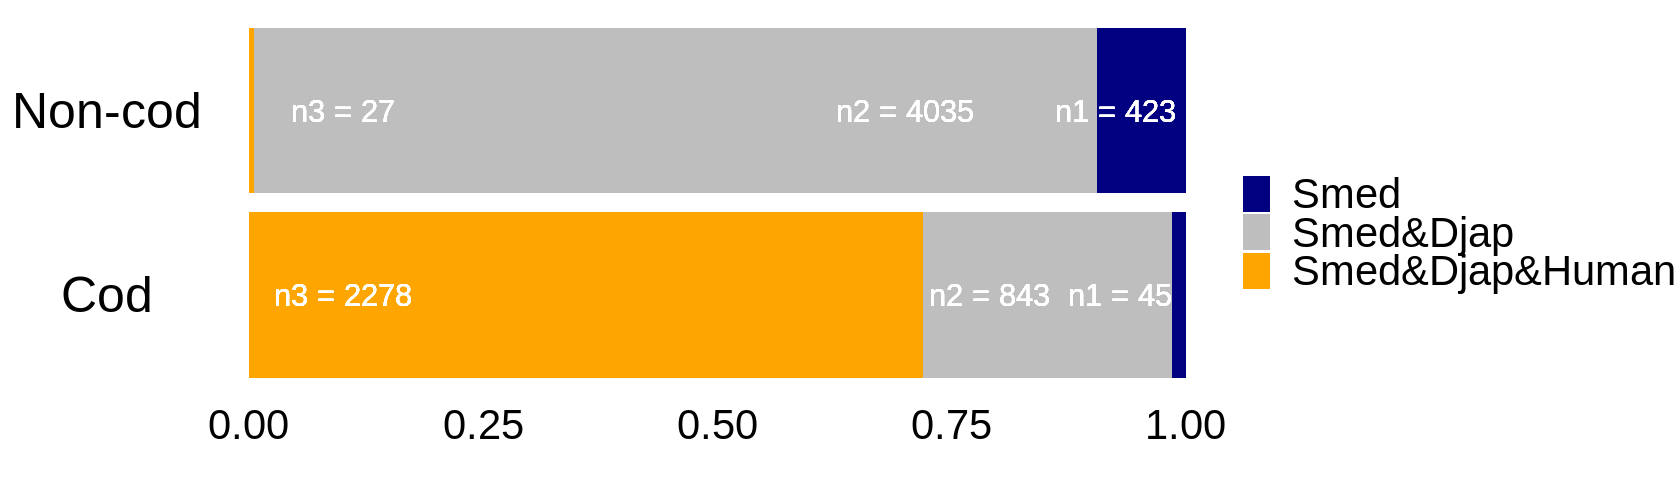

In [4]:
library(ggplot2)
options(repr.plot.width = 14.0, repr.plot.height = 4)
df = data.frame(class=factor(c("Smed", "Smed&Djap", "Smed&Djap&Human"), levels=c("Smed", "Smed&Djap", "Smed&Djap&Human")), value=c(45, 843, 2278, 423, 4035, 27), id = c("Cod", "Cod", "Cod", "Non-cod", "Non-cod", "Non-cod"))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + scale_fill_manual(name=" ", values=c("navyblue", "grey", "orange"))
p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
#p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
p = p + geom_text(aes(label=c("n1 = 45"), y=c(0.93), x=1), size = 6.5, col="white")
p = p + geom_text(aes(label=c("n2 = 843"), y=c(0.79), x=1), size = 6.5, col="white")
p = p + geom_text(aes(label=c("n3 = 2278"), y=c(0.1), x=1), size = 6.5, col="white")
p = p + geom_text(aes(label=c("n1 = 423"), y=c(0.925), x=2), size = 6.5, col="white")
p = p + geom_text(aes(label=c("n2 = 4035"), y=c(0.7), x=2), size = 6.5, col="white")
p = p + geom_text(aes(label=c("n3 = 27"), y=c(0.1), x=2), size = 6.5, col="white")
p

In [2]:
#Coding Human&Djap
3121-929
#Coding Human
929-439

[1] 2192

[1] 490

In [20]:
2192/3121

[1] 0.702339

In [11]:
#Non-coding Human&Djap
4291-693
#Non-coding Human
693-27

[1] 3598

[1] 666

In [22]:
666/4291
3598/4291

[1] 0.1552086

[1] 0.8384992

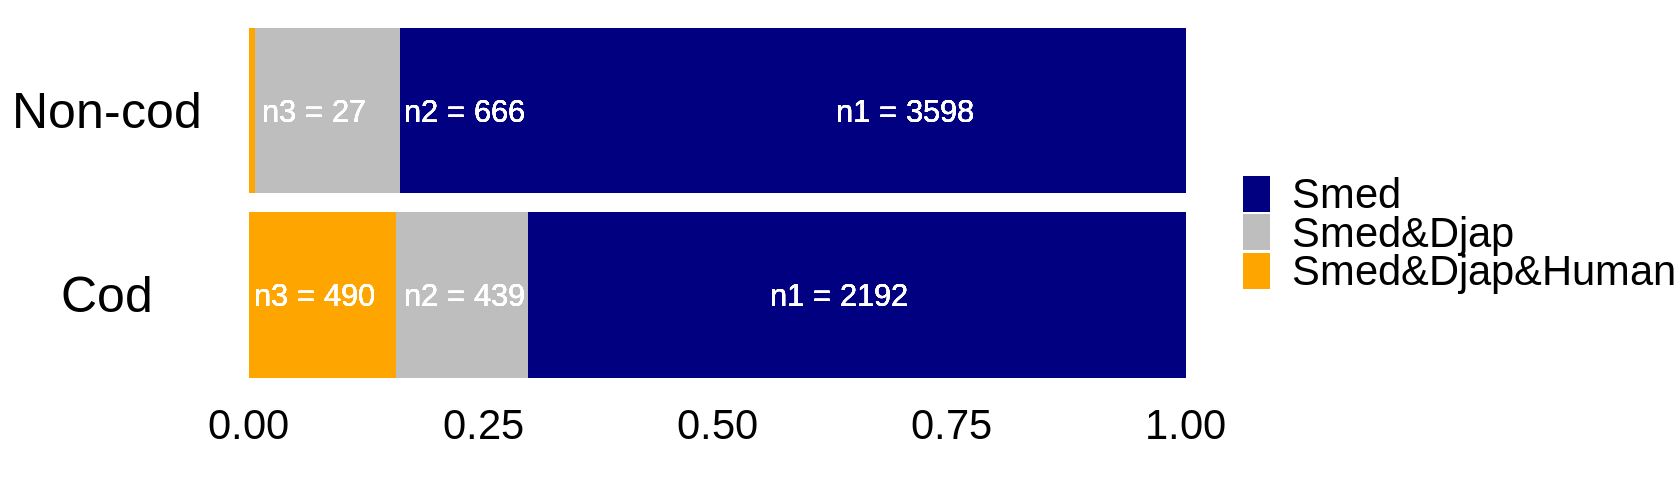

In [19]:
library(ggplot2)
options(repr.plot.width = 14.0, repr.plot.height = 4)
df = data.frame(class=factor(c("Smed", "Smed&Djap", "Smed&Djap&Human"), levels=c("Smed", "Smed&Djap", "Smed&Djap&Human")), value=c(2192, 439, 490, 3598, 666, 27), id = c("Cod", "Cod", "Cod", "Non-cod", "Non-cod", "Non-cod"))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + scale_fill_manual(name=" ", values=c("navyblue", "grey", "orange"))
p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
#p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
p = p + geom_text(aes(label=c("n1 = 2192"), y=c(0.63), x=1), size = 6.5, col="white")
p = p + geom_text(aes(label=c("n2 = 439"), y=c(0.23), x=1), size = 6.5, col="white")
p = p + geom_text(aes(label=c("n3 = 490"), y=c(0.07), x=1), size = 6.5, col="white")
p = p + geom_text(aes(label=c("n1 = 3598"), y=c(0.7), x=2), size = 6.5, col="white")
p = p + geom_text(aes(label=c("n2 = 666"), y=c(0.23), x=2), size = 6.5, col="white")
p = p + geom_text(aes(label=c("n3 = 27"), y=c(0.07), x=2), size = 6.5, col="white")
p

# 5. Genome tracks of isoforms

In [8]:
library(GenomicFeatures)
library(Gviz)
library(rtracklayer)

In [3]:
txdb = makeTxDbFromGFF("/hydra/sexual_genome_annotation_files/ncrna_Neiro/stringtie.Bioconductor.gtf", format = "gtf")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
OK



In [12]:
options(ucscChromosomeNames=FALSE)
txTr <- GeneRegionTrack(txdb, chromosome = "dd_Smes_g4_134", start = 477778-10000,  end = 490000, fill="orange", name="Isoforms", fontsize=10)
gtrack <- GenomeAxisTrack(cex=2)

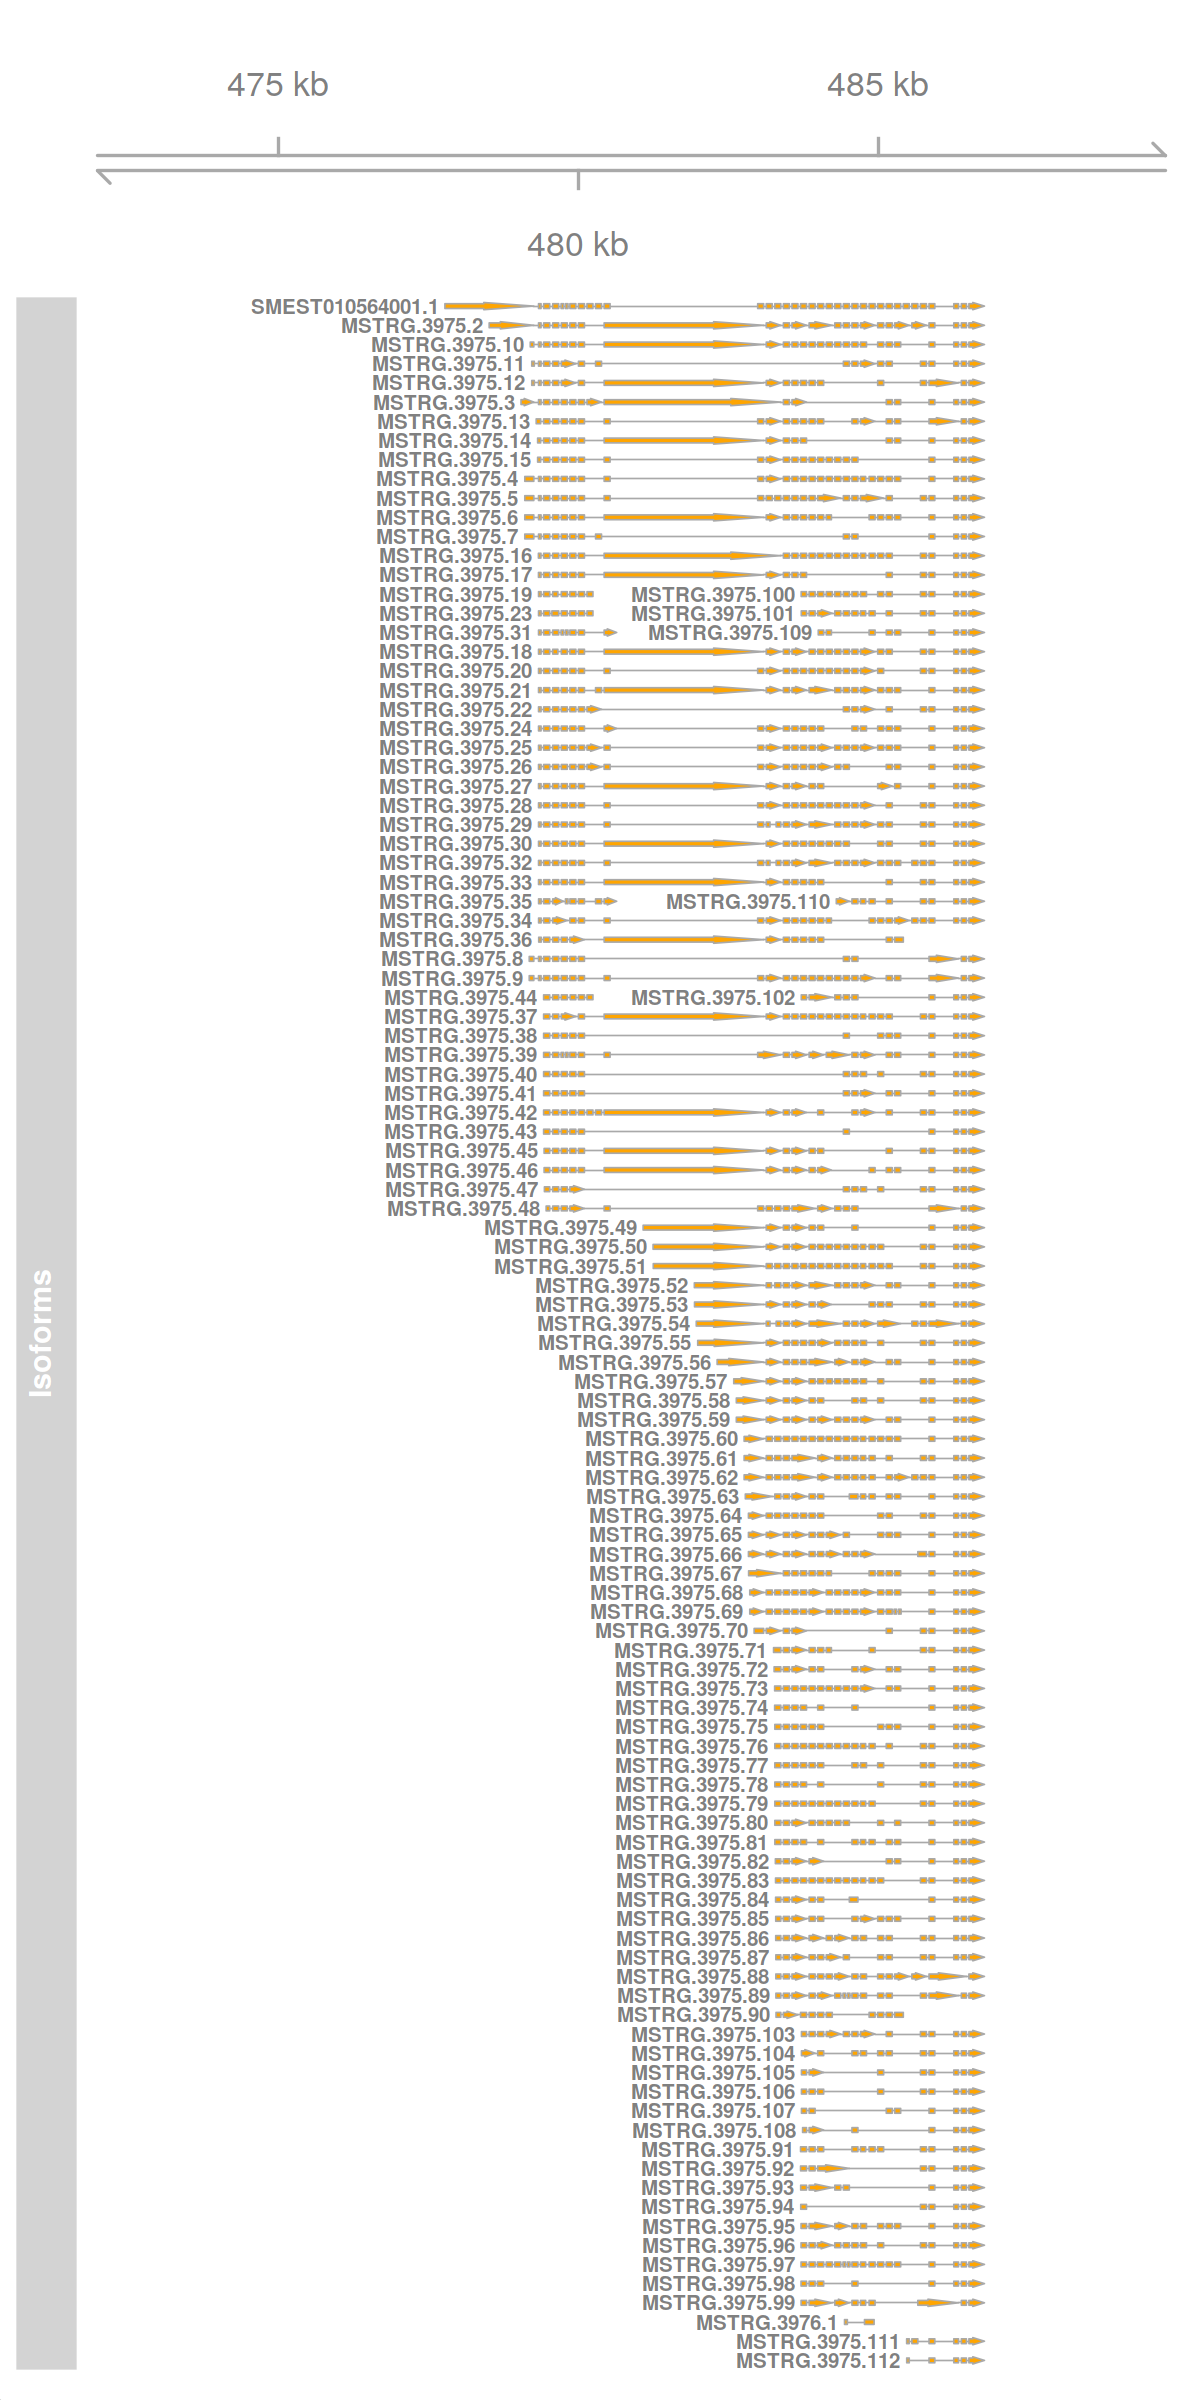

In [16]:
options(repr.plot.width = 10, repr.plot.height = 20)
plotTracks(c(gtrack, txTr), transcriptAnnotation = "symbol", cex.group=1.0, from=477778-6000, to=490000, shape = "arrow", featureAnnotation = "id")

In [21]:
txdb = makeTxDbFromGFF("/hydra/FACS/transcripts.fasta.revised.genome.gtf", format = "gtf")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
OK



In [22]:
txdb

TxDb object:
# Db type: TxDb
# Supporting package: GenomicFeatures
# Data source: /hydra/FACS/transcripts.fasta.revised.genome.gtf
# Organism: NA
# Taxonomy ID: NA
# miRBase build ID: NA
# Genome: NA
# Nb of transcripts: 73489
# Db created by: GenomicFeatures package from Bioconductor
# Creation time: 2021-08-14 20:24:22 +0000 (Sat, 14 Aug 2021)
# GenomicFeatures version at creation time: 1.42.3
# RSQLite version at creation time: 2.2.7
# DBSCHEMAVERSION: 1.2

In [23]:
options(ucscChromosomeNames=FALSE)
txTr <- GeneRegionTrack(txdb, chromosome = "dd_Smes_g4_134", start = 477778-10000,  end = 490000, fill="orange", name="Isoforms", fontsize=10)
gtrack <- GenomeAxisTrack(cex=2)

In [20]:
txTr

GeneRegionTrack 'Isoforms'
| genome: NA
| active chromosome: dd_Smes_g4_134
| annotation features: 4435

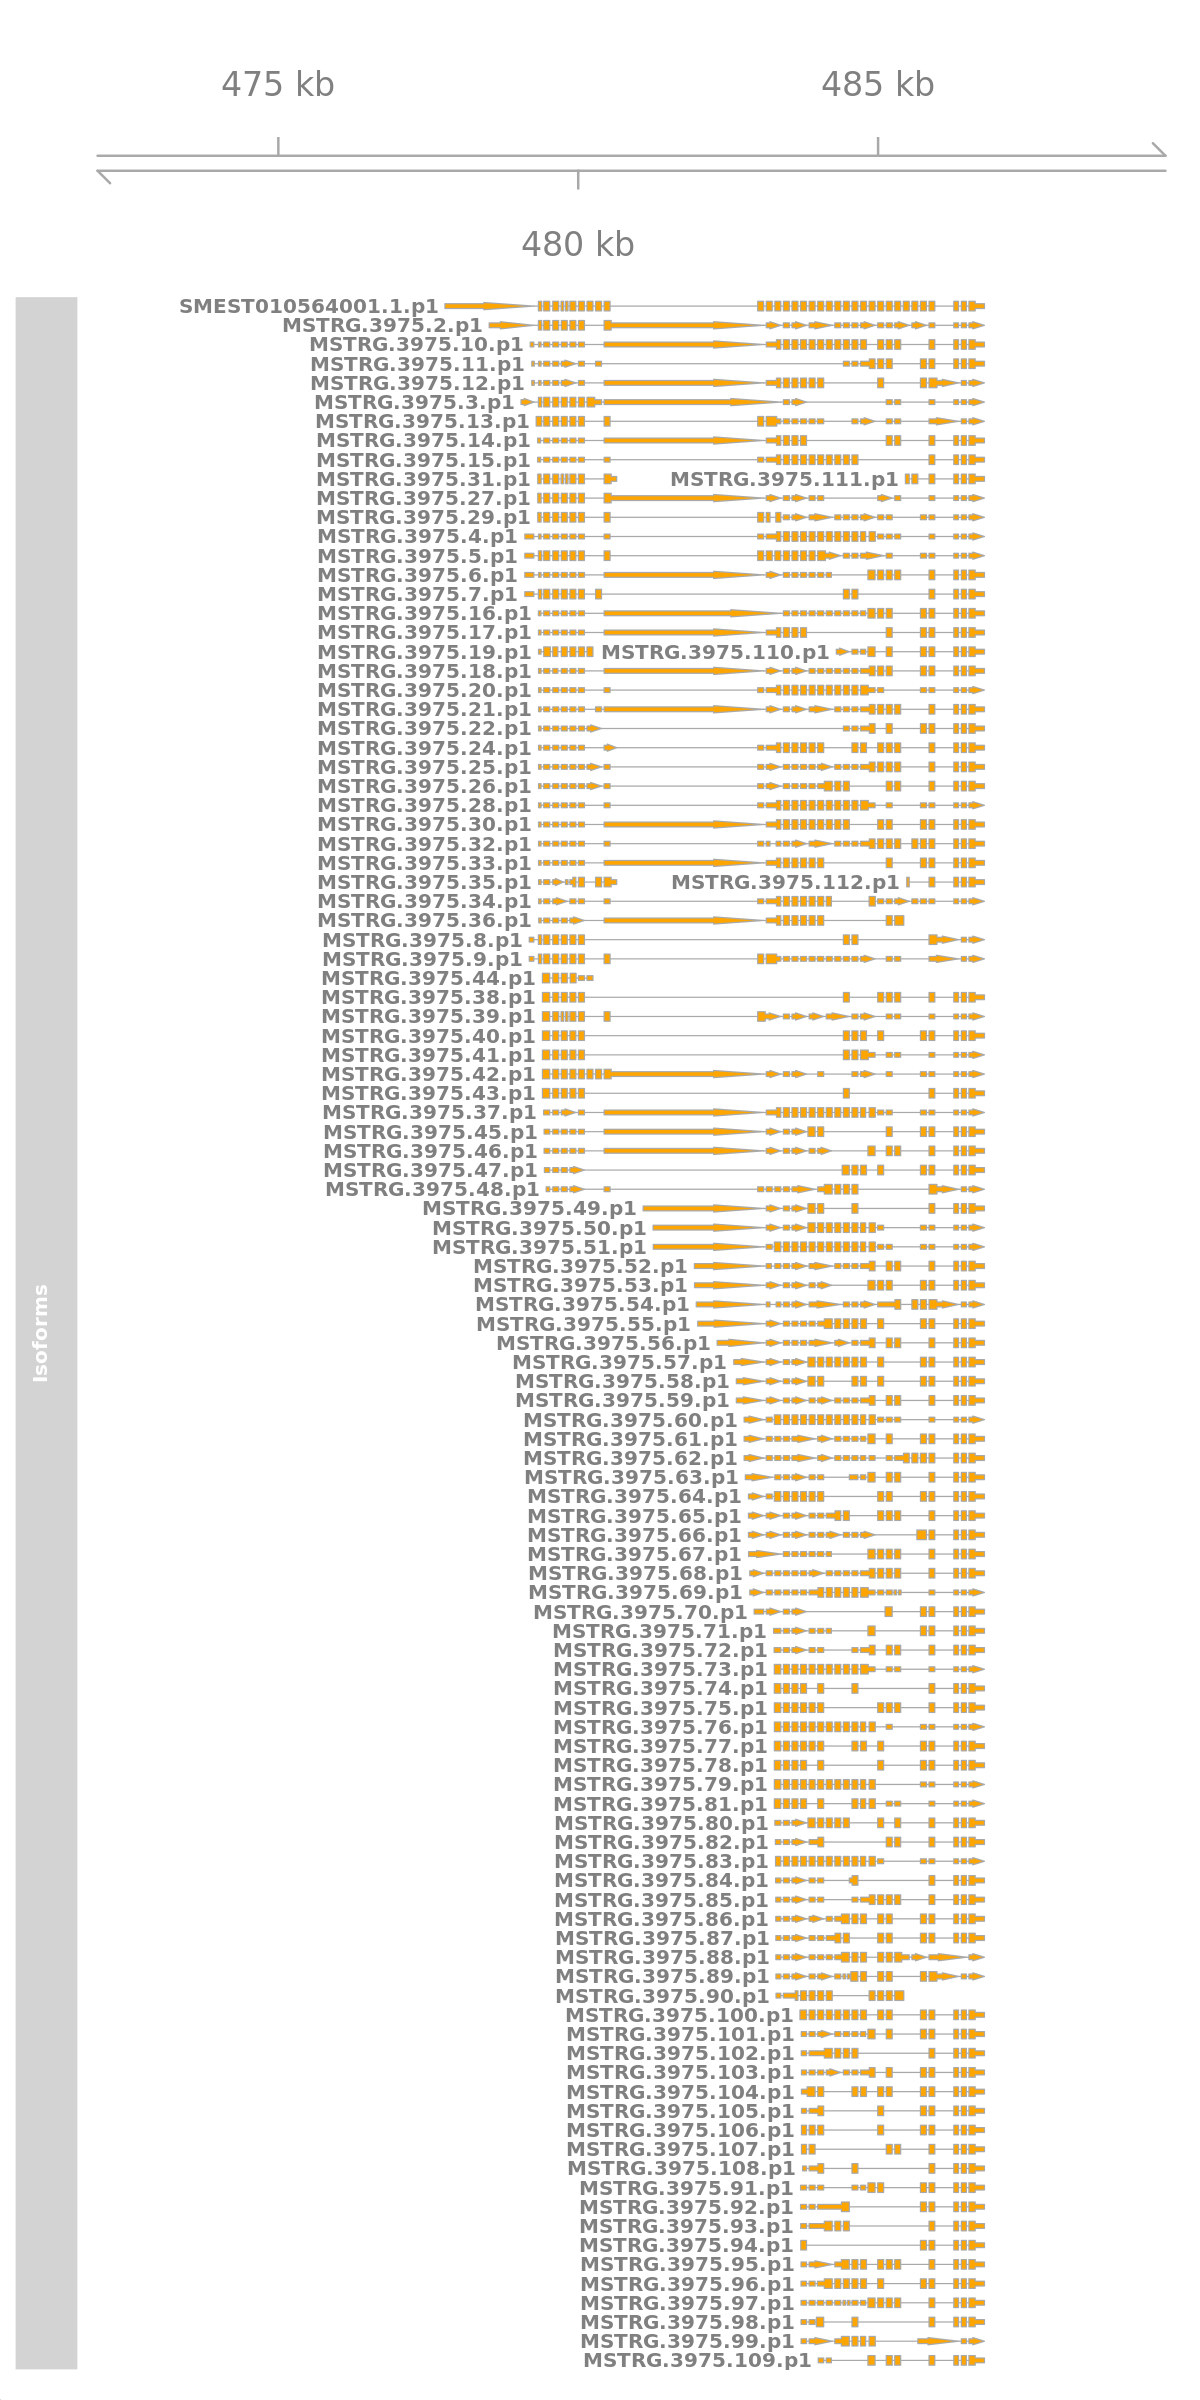

In [25]:
options(repr.plot.width = 10, repr.plot.height = 20)
plotTracks(c(gtrack, txTr), transcriptAnnotation = "symbol", cex.group=1.0, from=477778-6000, to=490000, shape = "arrow", featureAnnotation = "id")

# FINNISHED